<h1 style="color:maroon;">Fault Detection in Gas Turbine Engines using Sensor Data</h1>

***By: Garey Salinas***

---

## Overview

This notebook analyzes sensor data from industrial gas turbine engines to detect faults and support predictive maintenance. The main goal is to develop machine learning models that can accurately classify failures in gas compressors. This is critical for midstream pipeline operations where turbines drive compression systems.

----

## Dataset

- **Source:** Gas Turbine Engine Fault Detection Dataset (Kaggle)
- **Contents:** Sensor readings such as temperatures, pressures, rotational speeds, and a labeled fault indicator (0 = normal, 1 = fault).
- **Structure:** 1,386 rows × 10 columns, all continuous features except the binary fault label.

The dataframe has 1,386 rows and 10 columns. All columns are complete with no missing values. The features are mostly continuous floating point numbers, and the target column is Fault (int64), which represents a classification label (e.g., 0 = normal, 1 = fault). We will change the type of variable of column Fault to represent a boolean value.

| Column Name                      | Description                   | Unit/Type      |
|----------------------------------|-------------------------------|----------------|
| Temperature (°C)                 | Turbine temperature           | °C (float)     |
| RPM                              | Rotations per minute          | RPM (float)    |
| Torque (Nm)                      | Torque                        | Nm (float)     |
| Vibrations (mm/s)                | Vibration level               | mm/s (float)   |
| Power Output (MW)                | Power output                  | MW (float)     |
| Fuel Flow Rate (kg/s)            | Fuel flow rate                | kg/s (float)   |
| Air Pressure (kPa)               | Air pressure                  | kPa (float)    |
| Exhaust Gas Temperature (°C)     | Exhaust gas temperature       | °C (float)     |
| Oil Temperature (°C)             | Oil temperature               | °C (float)     |
| Fault (target)                   | Fault status (0/1)            | int (0 or 1)   |

---

## Objectives

- Build classification models to detect and classify faults.
- Engineer features (e.g., pressure ratios, temperature differentials, time-based deltas).
- Apply outlier detection to identify sensor anomalies.

---

## Techniques and Tools

**Machine Learning Models:**
- Random Forest
- XGBoost
- Support Vector Machines

**Outlier Detection:**
- Isolation Forest
- DBSCAN

**Python Libraries:**
- scikit-learn
- xgboost
- numpy
- pandas
- seaborn
- matplotlib

---

## Value and Impact

This project aims to:
- Detect which features contribute to early equipment degradation
- Enhance pipeline safety
- Lower operational costs

---

## Import Libraries

In [1]:
# import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')  

---

## Load Dataset

In [2]:
# Load the dataset
data = pd.read_csv('data/gas_turbine_fault_detection.csv')

data.head()

,Temperature (°C),RPM,Torque (Nm),Vibrations (mm/s),Power Output (MW),Fuel Flow Rate (kg/s),Air Pressure (kPa),Exhaust Gas Temperature (°C),Oil Temperature (°C),Fault
0,924.835708,15650.870645,3464.645167,1.675087,96.347590,2.265294,146.245460,517.611726,90.530958,0
1,893.086785,15780.755598,3190.276340,2.042084,83.288302,2.755950,166.812134,500.196460,136.047350,0
2,932.384427,15016.002075,3401.769251,2.006414,120.358735,2.574244,133.494161,516.272719,124.910039,0
3,976.151493,14623.291065,3443.024901,2.239914,104.689781,2.497101,140.141635,475.731083,123.298231,1
4,888.292331,15229.986071,3448.764050,1.865677,95.080431,2.763689,109.795667,546.737163,119.382239,1


---

## Exploratory Data Analysis

In [3]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Temperature (°C)              1386 non-null   float64
 1   RPM                           1386 non-null   float64
 2   Torque (Nm)                   1386 non-null   float64
 3   Vibrations (mm/s)             1386 non-null   float64
 4   Power Output (MW)             1386 non-null   float64
 5   Fuel Flow Rate (kg/s)         1386 non-null   float64
 6   Air Pressure (kPa)            1386 non-null   float64
 7   Exhaust Gas Temperature (°C)  1386 non-null   float64
 8   Oil Temperature (°C)          1386 non-null   float64
 9   Fault                         1386 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 108.4 KB


In [4]:
df.describe()

,Temperature (°C),RPM,Torque (Nm),Vibrations (mm/s),Power Output (MW),Fuel Flow Rate (kg/s),Air Pressure (kPa),Exhaust Gas Temperature (°C),Oil Temperature (°C),Fault
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000
mean,901.623932,15022.591497,3494.764285,1.978964,99.497230,2.505591,150.320568,498.865296,120.061923,0.306638
std,49.381498,490.048647,203.828153,0.494025,10.309697,0.316582,19.430192,28.793950,10.005188,0.461264
min,737.936633,13490.243922,2901.772806,0.411648,71.004861,1.349003,93.961769,382.327992,86.244209,0.000000
25%,868.117411,14688.039309,3355.445978,1.658465,92.387182,2.296762,137.688214,479.238499,113.652494,0.000000
50%,901.964879,15016.737353,3490.639925,1.989549,99.378143,2.500537,150.464896,498.865627,119.968056,0.000000
75%,932.692748,15346.057959,3627.482077,2.322288,106.454488,2.724751,163.130104,518.337798,126.570199,1.000000
max,1092.636575,16596.553784,4285.247541,3.556455,135.290552,3.513215,213.155426,587.423276,153.777682,1.000000


### Distribution Breakdown of Each Column

- **Temperature (°C)**
  - Mean: 901.62, Std: 49.38
  - Min: 737.94, 25%: 868.12, Median: 901.96, 75%: 932.69, Max: 1092.64
  - Most values are centered around 900°C, moderate spread.

- **RPM**
  - Mean: 15022.59, Std: 490.05
  - Min: 13490.24, 25%: 14688.04, Median: 15016.74, 75%: 15346.06, Max: 16596.55
  - Tightly clustered around 15,000 RPM.

- **Torque (Nm)**
  - Mean: 3494.76, Std: 203.83
  - Min: 2901.77, 25%: 3355.45, Median: 3490.64, 75%: 3627.48, Max: 4285.25
  - Most values near 3,500 Nm.

- **Vibrations (mm/s)**
  - Mean: 1.98, Std: 0.49
  - Min: 0.41, 25%: 1.66, Median: 1.99, 75%: 2.32, Max: 3.56
  - Slight right skew, most between 1.6 and 2.3 mm/s.

- **Power Output (MW)**
  - Mean: 99.50, Std: 10.31
  - Min: 71.00, 25%: 92.39, Median: 99.38, 75%: 106.45, Max: 135.29
  - Most values close to 100 MW.

- **Fuel Flow Rate (kg/s)**
  - Mean: 2.51, Std: 0.32
  - Min: 1.35, 25%: 2.30, Median: 2.50, 75%: 2.72, Max: 3.51
  - Most between 2.3 and 2.7 kg/s.

- **Air Pressure (kPa)**
  - Mean: 150.32, Std: 19.43
  - Min: 93.96, 25%: 137.69, Median: 150.46, 75%: 163.13, Max: 213.16
  - Centered around 150 kPa.

- **Exhaust Gas Temperature (°C)**
  - Mean: 498.87, Std: 28.79
  - Min: 382.33, 25%: 479.24, Median: 498.87, 75%: 518.34, Max: 587.42
  - Most values near 500°C.

- **Oil Temperature (°C)**
  - Mean: 120.06, Std: 10.01
  - Min: 86.24, 25%: 113.65, Median: 119.97, 75%: 126.57, Max: 153.78
  - Most between 113.65 and 126.57°C.

- **Fault (target)**
  - Mean: 0.31, Std: 0.46
  - Min: 0, 25%: 0, Median: 0, 75%: 1, Max: 1
  - 31% faults (1), 69% normal (0); imbalanced data.

### Check for Missing Values

In [5]:
# Check for missing values
df.isnull().sum()

Temperature (°C)                0
RPM                             0
Torque (Nm)                     0
Vibrations (mm/s)               0
Power Output (MW)               0
Fuel Flow Rate (kg/s)           0
Air Pressure (kPa)              0
Exhaust Gas Temperature (°C)    0
Oil Temperature (°C)            0
Fault                           0
dtype: int64

### Check for Duplicate Rows

In [6]:
# Perform basic data cleaning
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')
# Remove duplicate rows if any

Number of duplicate rows: 0


### Change Column Names

In [7]:
# Change the column names to lowercase
df.columns = df.columns.str.lower()
# Rename columns for easier access
df.rename(columns={
    'temperature (°c)': 'temperature',
    'torque (nm)': 'torque',
    'vibrations (mm/s)': 'vibrations',
    'power output (mw)': 'power_output',
    'fuel flow rate (kg/s)': 'fuel_flow_rate',
    'air pressure (kpa)': 'air_pressure',
    'exhaust gas temperature (°c)': 'exhaust_gas_temperature',
    'oil temperature (°c)': 'oil_temperature'
}, inplace=True)
# Check the data types of the columns
df.dtypes


temperature                float64
rpm                        float64
torque                     float64
vibrations                 float64
power_output               float64
fuel_flow_rate             float64
air_pressure               float64
exhaust_gas_temperature    float64
oil_temperature            float64
fault                        int64
dtype: object

### Change Fault Type to Boolean

In [8]:
# Convert Fault column to boolean
df['fault'] = df['fault'].astype(bool)

### Feature Engineering

In [9]:
# Thermal efficiency calculation
df['exhaust_efficiency_ratio'] = df['exhaust_gas_temperature'] / df['temperature']

# RPM-to-Torque Ratio
# Inverse of torque-speed, could catch imbalance or slippage
df['rpm_torque_ratio'] = df['rpm'] / (df['torque'] + 1e-6)

# Normalized Vibrations
# Vibrations relative tot RPM tot detect dynamic imbalance
df['vibrations_normalized'] = df['vibrations'] / (df['rpm'] + 1e-6)

# Oil temperature to Torque Ratio
df['oil_temp_torque_ratio'] = df['oil_temperature'] / (df['torque'])

# Power and Torque Ratios
# These ratios can help identify performance issues
df['power_torque_ratio'] = df['power_output'] / (df['torque'])

# Oil temperature to RPM Ratio
df['oil_temp_rpm_ratio'] = df['oil_temperature'] / (df['rpm'] + 1e-6)

# Oil temperature to Power Ratio
df['oil_temp_power_ratio'] = df['oil_temperature'] / (df['power_output'] + 1e-6)

# Oil temperature to Vibrations Ratio
# This ratio can help identify issues related to lubrication and cooling
df['oil_temp_vibrations_ratio'] = df['oil_temperature'] / (df['vibrations'] + 1e-6)

# Oil temperature to Exhaust Gas Temperature Ratio
# This ratio can help identify issues related to thermal management
df['oil_temp_exhaust_ratio'] = df['oil_temperature'] / (df['exhaust_gas_temperature'] + 1e-6)

# Power output per unit vibrations
# This ratio can help identify performance issues related to vibrations
df['power_vibrations_ratio'] = df['power_output'] / (df['vibrations'] + 1e-6)

# Torque to Fuel Flow Rate Ratio
# This ratio can help identify issues related to fuel efficiency
df['torque_fuel_ratio'] = df['torque'] / (df['fuel_flow_rate'] + 1e-6)

# Air pressure to Fuel Flow Rate Ratio
# This ratio can help identify issues related to air-fuel mixture
df['comp_pressure_ratio'] = df['air_pressure'] / df['fuel_flow_rate']

# Fuel Flow Rate to RPM Ratio
# This ratio can help identify issues related to fuel efficiency at different RPMs
df['fuel_flow_per_rpm'] = df['fuel_flow_rate'] / df['rpm']

# Torque to RPM Ratio
# This ratio can help identify issues related to torque production at different RPMs
df['torque_per_rpm'] = df['torque'] / (df['rpm'] + 1e-6)

# Power to RPM Ratio
# This ratio can help identify issues related to power production at different RPMs
df['power_per_rpm'] = df['power_output'] / (df['rpm'] + 1e-6)

# Vibrations to torque Ratio
# This ratio can help identify issues related to vibrations and torque production
df['vibrations_torque_ratio'] = df['vibrations'] / (df['torque'] + 1e-6)

# Temperature to Torque Ratio
# This ratio can help identify issues related to temperature and torque production
df['temperature_torque_ratio'] = df['temperature'] / (df['torque'] + 1e-6)

# Exhaust Gas Temperature to Torque Ratio
# This ratio can help identify issues related to exhaust gas temperature and torque production
df['exhaust_temp_torque_ratio'] = df['exhaust_gas_temperature'] / (df['torque'] + 1e-6)

# Air Pressure to Torque Ratio
# This ratio can help identify issues related to air pressure and torque production
df['air_pressure_torque_ratio'] = df['air_pressure'] / (df['torque'] + 1e-6)

# Torque per Fuel Flow Rate
# This ratio can help identify issues related to fuel efficiency and torque production
df['torque_per_fuel'] = df['torque'] / (df['fuel_flow_rate'] + 1e-6)



In [10]:
df.dtypes

temperature                  float64
rpm                          float64
torque                       float64
vibrations                   float64
power_output                 float64
fuel_flow_rate               float64
air_pressure                 float64
exhaust_gas_temperature      float64
oil_temperature              float64
fault                           bool
exhaust_efficiency_ratio     float64
rpm_torque_ratio             float64
vibrations_normalized        float64
oil_temp_torque_ratio        float64
power_torque_ratio           float64
oil_temp_rpm_ratio           float64
oil_temp_power_ratio         float64
oil_temp_vibrations_ratio    float64
oil_temp_exhaust_ratio       float64
power_vibrations_ratio       float64
torque_fuel_ratio            float64
comp_pressure_ratio          float64
fuel_flow_per_rpm            float64
torque_per_rpm               float64
power_per_rpm                float64
vibrations_torque_ratio      float64
temperature_torque_ratio     float64
e

### Univariate Analysis

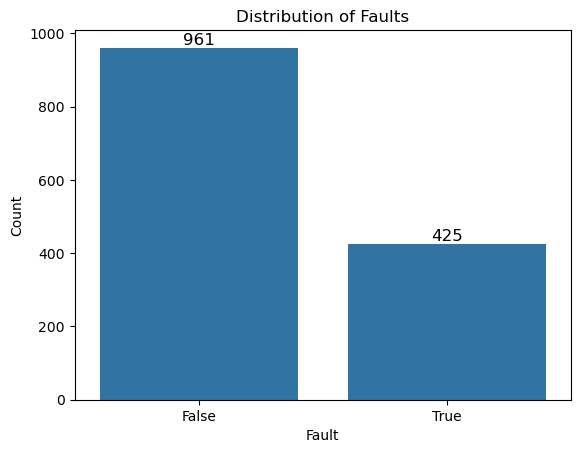

In [11]:
# Visualize the distribution of the target variable with value counts on bars
ax = sns.countplot(x='fault', data=df)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')
plt.title('Distribution of Faults')
plt.xlabel('Fault')
plt.ylabel('Count')
plt.show()

The bar chart above shows the distribution of the target variable Fault in the dataset. There are 961 instances labeled as "False" (no fault) and 425 instances labeled as "True" (fault). This indicates that approximately 31% of the data represents fault conditions, while 69% represents normal operation, highlighting a moderate class imbalance in the dataset.

In [12]:
# Get all numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

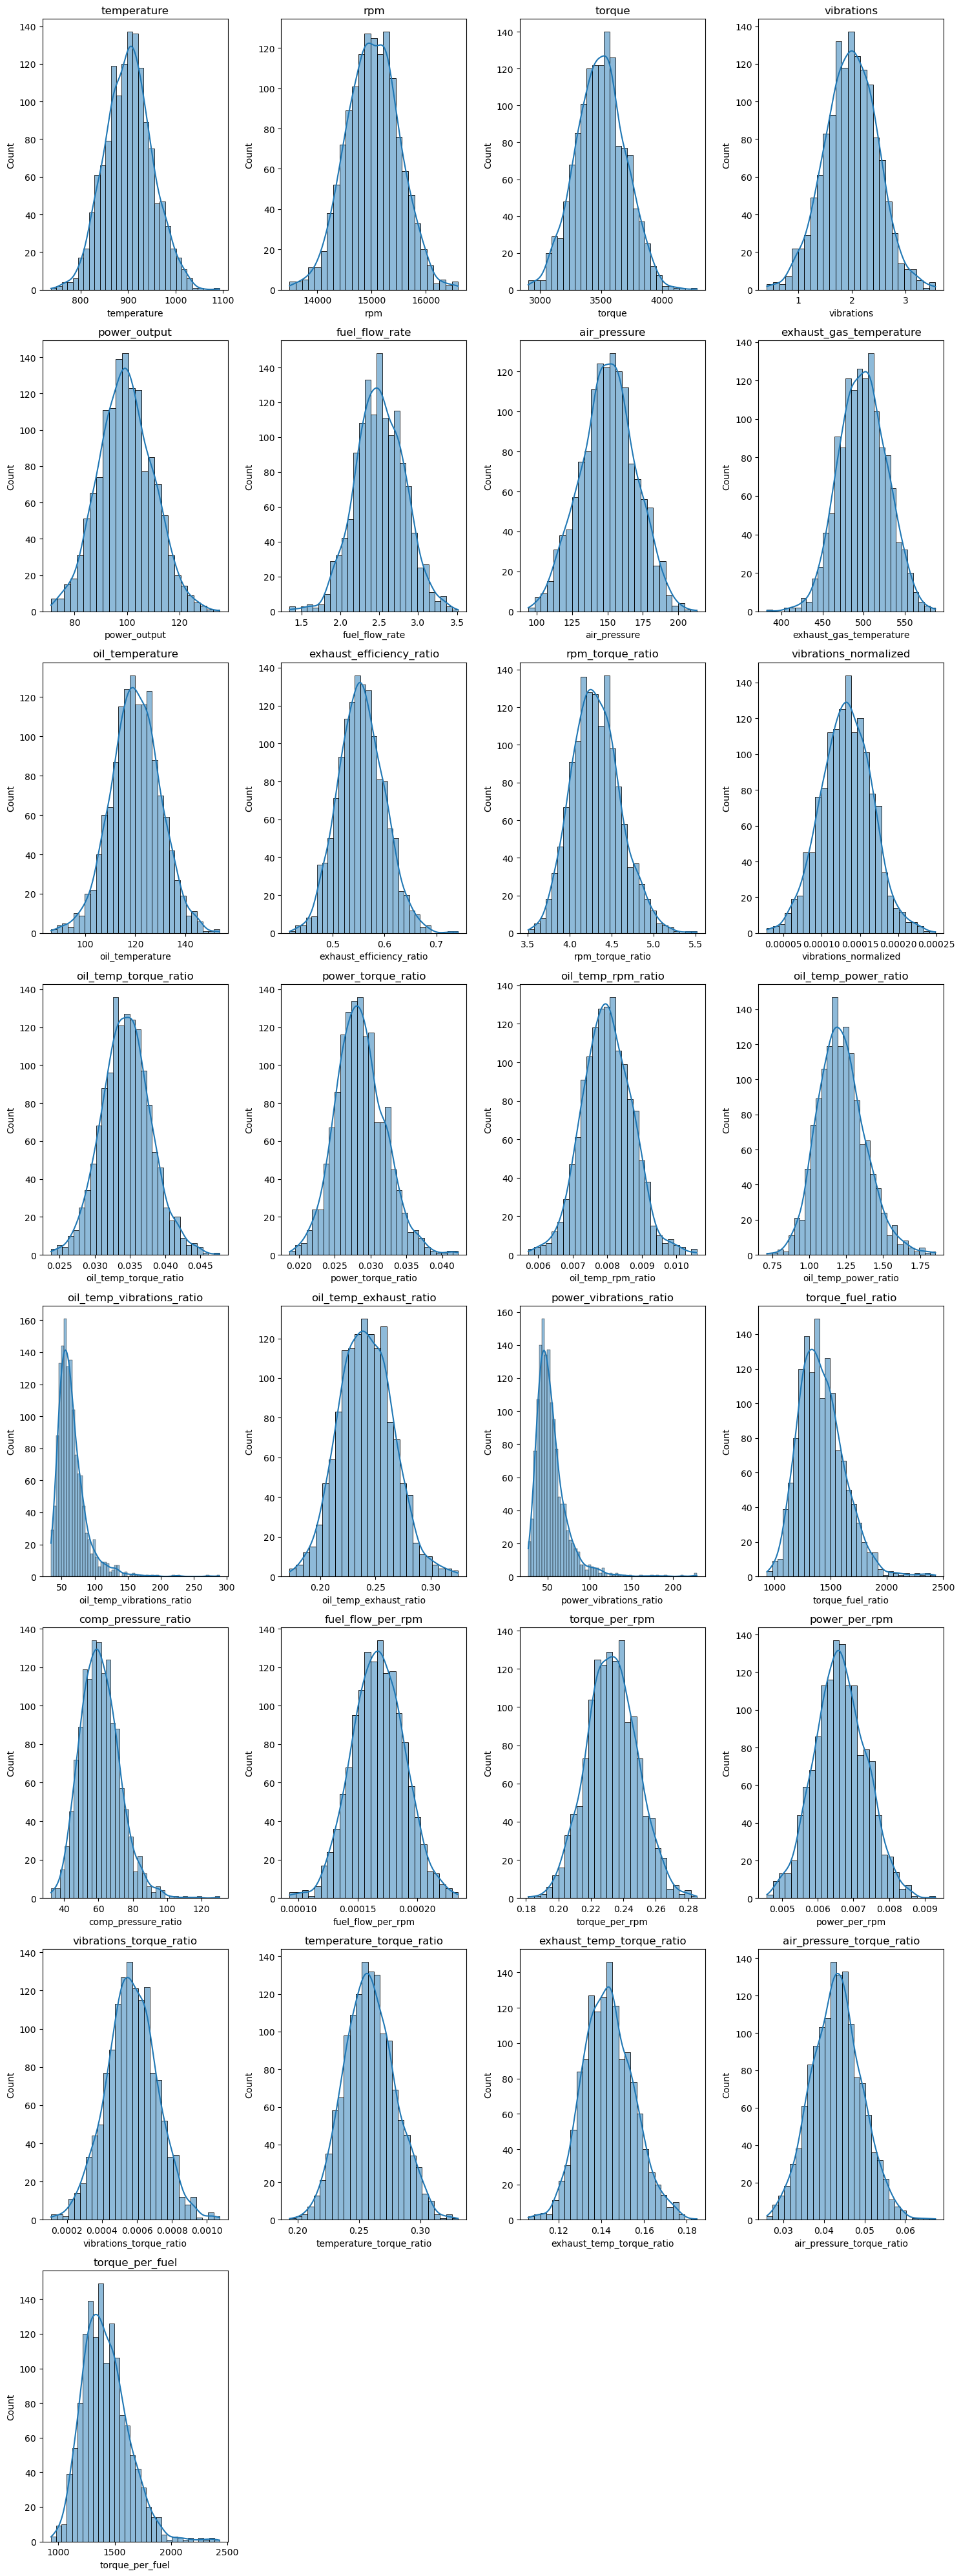

In [13]:
# Visualize the distribution of each feature
# Adjust the number of rows and columns dynamically
num_cols = len(numeric_cols)
num_rows = (num_cols + 3) // 4  # Calculate rows needed for 4 columns per row

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure height based on rows
for i, column in enumerate(df[numeric_cols]):
    plt.subplot(num_rows, 4, i + 1)  # Adjust grid layout dynamically
    sns.histplot(df[column], kde=True)
    plt.title(column)
plt.tight_layout()

The image contains a series of **histograms with kernel density estimates (KDE)** for all numeric features in the dataset, including both original sensor readings and engineered features. Each plot visualizes the distribution of values for a specific feature, highlighting their central tendency, spread, and shape. Below is an analysis:

#### Key Observations:

1. **Original Features (e.g., Temperature, RPM, Torque):**
   - Most original features, such as `temperature`, `rpm`, and `torque`, exhibit approximately normal distributions, centered around their respective means, with slight variations in spread.
   - Features like `vibrations` show a slight right skew, indicating the presence of higher values in the tail.

2. **Engineered Features (e.g., Ratios):**
   - Many engineered features, such as `power_torque_ratio` and `fuel_flow_per_rpm`, also show symmetric distributions, while some exhibit narrower or wider spreads compared to the original features.
   - Features like `oil_temp_vibrations_ratio` and `vibrations_normalized` display right-skewed distributions, indicating the presence of extreme values or outliers.

3. **Skewness and Outliers:**
   - A few features, such as `oil_temp_vibrations_ratio` and `fuel_flow_per_rpm`, display noticeable skewness, with long tails on one side of the distribution.
   - These skewed distributions may indicate the presence of outliers or operational anomalies.

4. **Feature Variability:**
   - The distributions vary in terms of range and density, reflecting the diversity of the dataset's features:
     - Features like `air_pressure` and `rpm` are tightly clustered around their means, indicating consistent behavior.
     - Ratios such as `vibrations_torque_ratio` and `fuel_flow_per_rpm` show smaller ranges, suggesting more consistent values.

5. **Insights for Fault Detection:**
   - While some features exhibit variability, most distributions overlap significantly, making it challenging to distinguish faults based on individual features.
   - The engineered features, particularly ratios, may provide additional insights into operational dynamics and fault detection.

#### Conclusion:
The histograms reveal that most features follow approximately normal distributions, with a few exceptions showing skewness or outliers. The engineered features add diversity to the dataset and may help capture complex relationships. However, the significant overlap in distributions suggests that fault detection will likely require multivariate analysis or machine learning models to effectively differentiate between normal and faulty conditions.

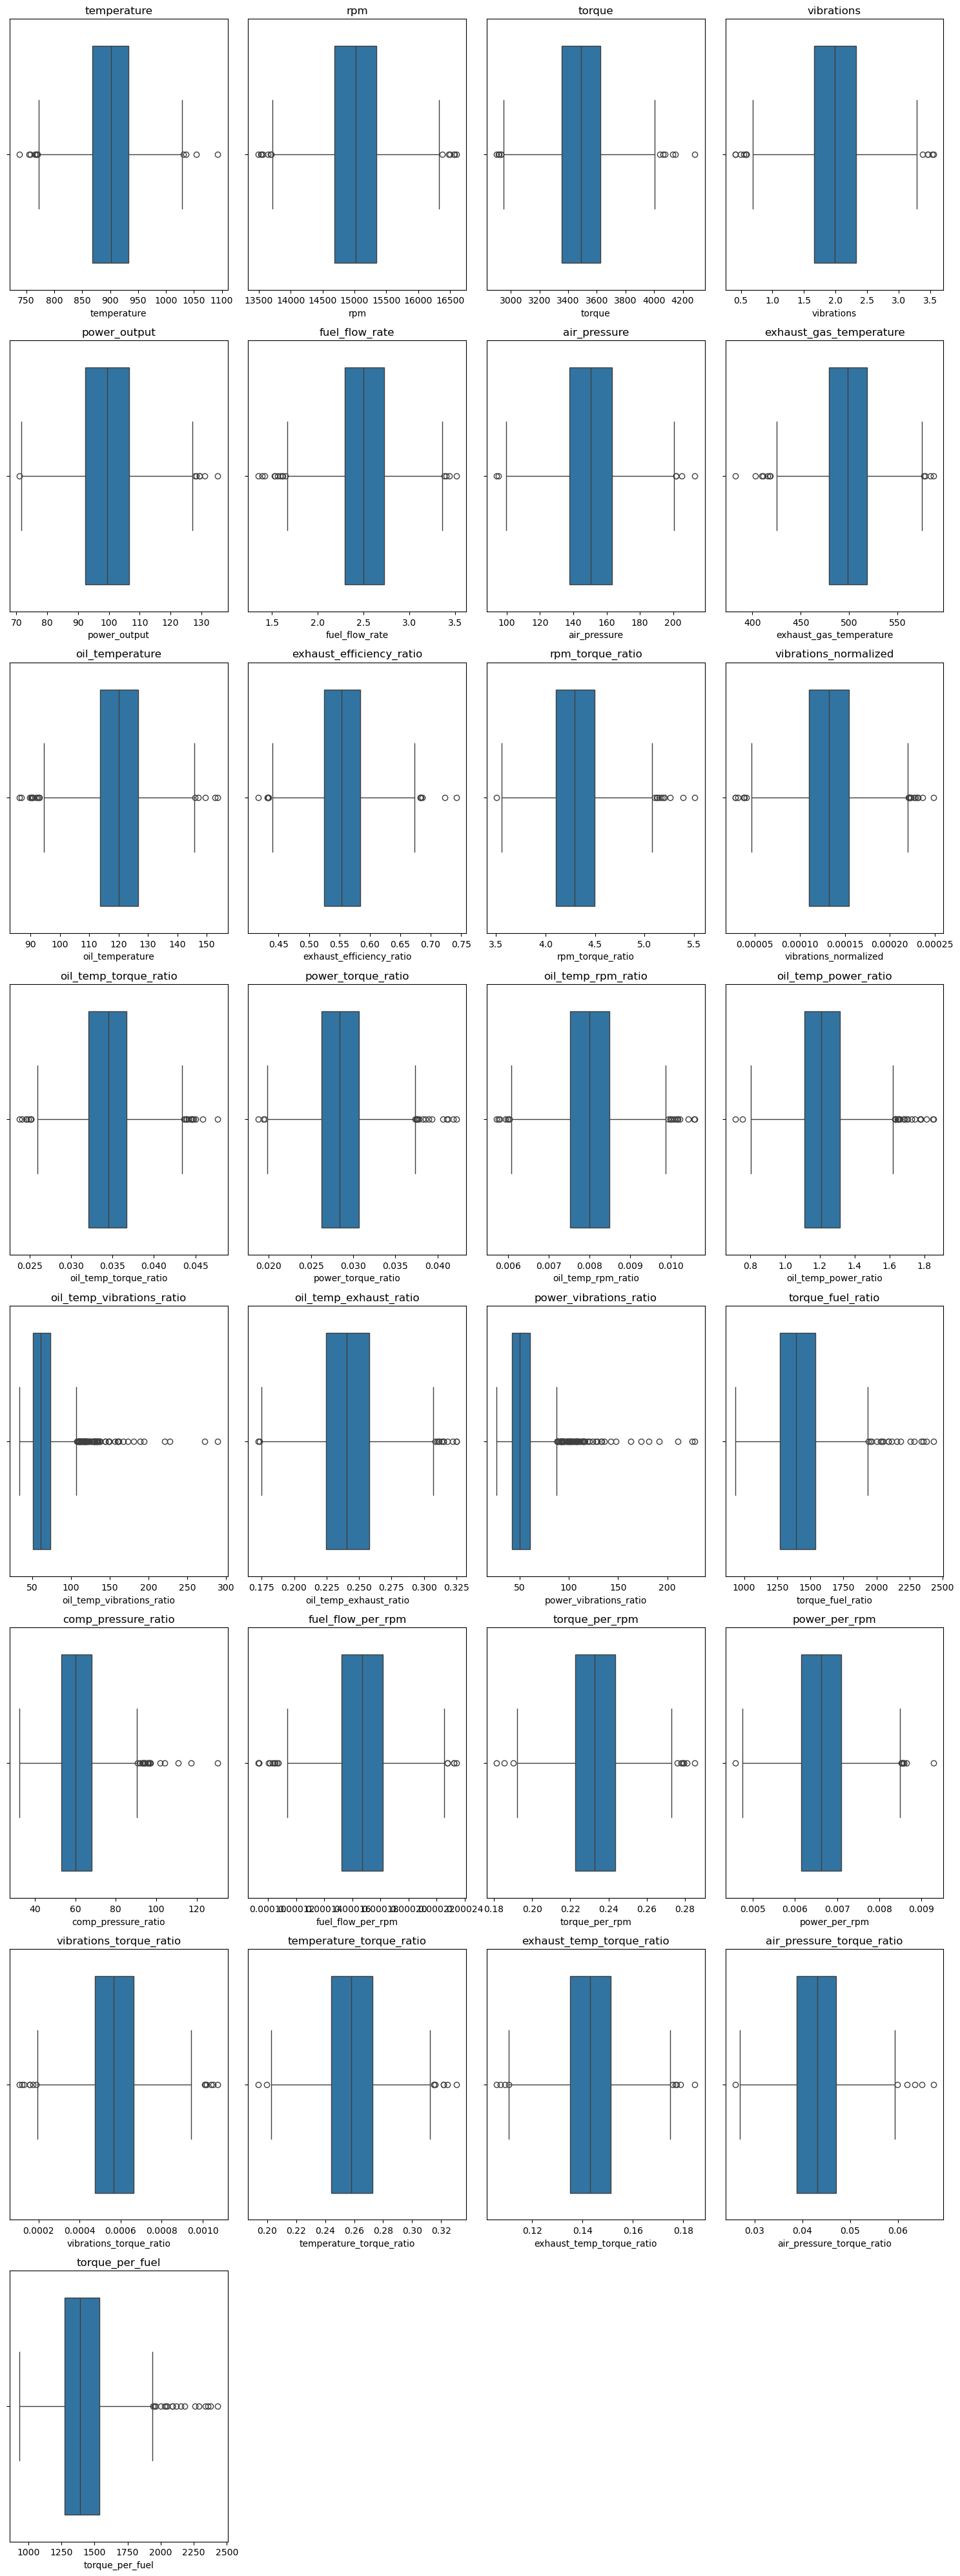

In [14]:
# Visulize boxplot for each feature to check for outliers
# Visualize boxplot for each feature to check for outliers
num_cols = len(numeric_cols)
num_rows = (num_cols + 3) // 4  # Calculate rows needed for 4 columns per row

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure height based on rows
for i, column in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, i + 1)  # Adjust grid layout dynamically
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()

The image contains a series of **boxplots** for all numeric features in the dataset, visualizing their distributions and highlighting potential outliers. Below is an analysis:

#### Key Observations:
1. **Original Features (e.g., Temperature, RPM, Torque):**
   - Features like `temperature`, `rpm`, and `torque` exhibit symmetric distributions with a few outliers on both the lower and upper ends.
   - Most values are tightly clustered around their respective medians, indicating relatively stable operating conditions.

2. **Engineered Features (e.g., Ratios):**
   - Some engineered features, such as `power_torque_ratio` and `fuel_flow_per_rpm`, show narrower distributions with fewer outliers.
   - Features like `oil_temp_vibrations_ratio` and `vibrations_normalized` display wider spreads and more extreme outliers, suggesting variability in these metrics.

3. **Outliers:**
   - Several features, including `fuel_flow_rate`, `vibrations_normalized`, and `oil_temp_exhaust_ratio`, have noticeable outliers.
   - These outliers may represent anomalies or extreme operating conditions that could be relevant for fault detection.

4. **Feature Variability:**
   - The range and spread of values vary significantly across features. For example:
     - `air_pressure` has a narrower range compared to `torque` or `temperature`.
     - Ratios like `rpm_torque_ratio` and `vibrations_torque_ratio` show smaller ranges, indicating more consistent behavior.

5. **Insights for Fault Detection:**
   - While some features exhibit variability and outliers, most distributions overlap significantly, making it challenging to distinguish faults based on individual features.
   - This suggests that fault detection will likely require multivariate analysis or machine learning models to capture complex relationships between features.

#### Conclusion:
The boxplots reveal that while some features show variability and outliers, the overall distributions suggest stable operating conditions for most features. Outliers and engineered features with wider spreads may provide valuable insights for fault detection. Advanced modeling techniques will likely be necessary to leverage the relationships between features effectively.

---

### Multivariate Analysis

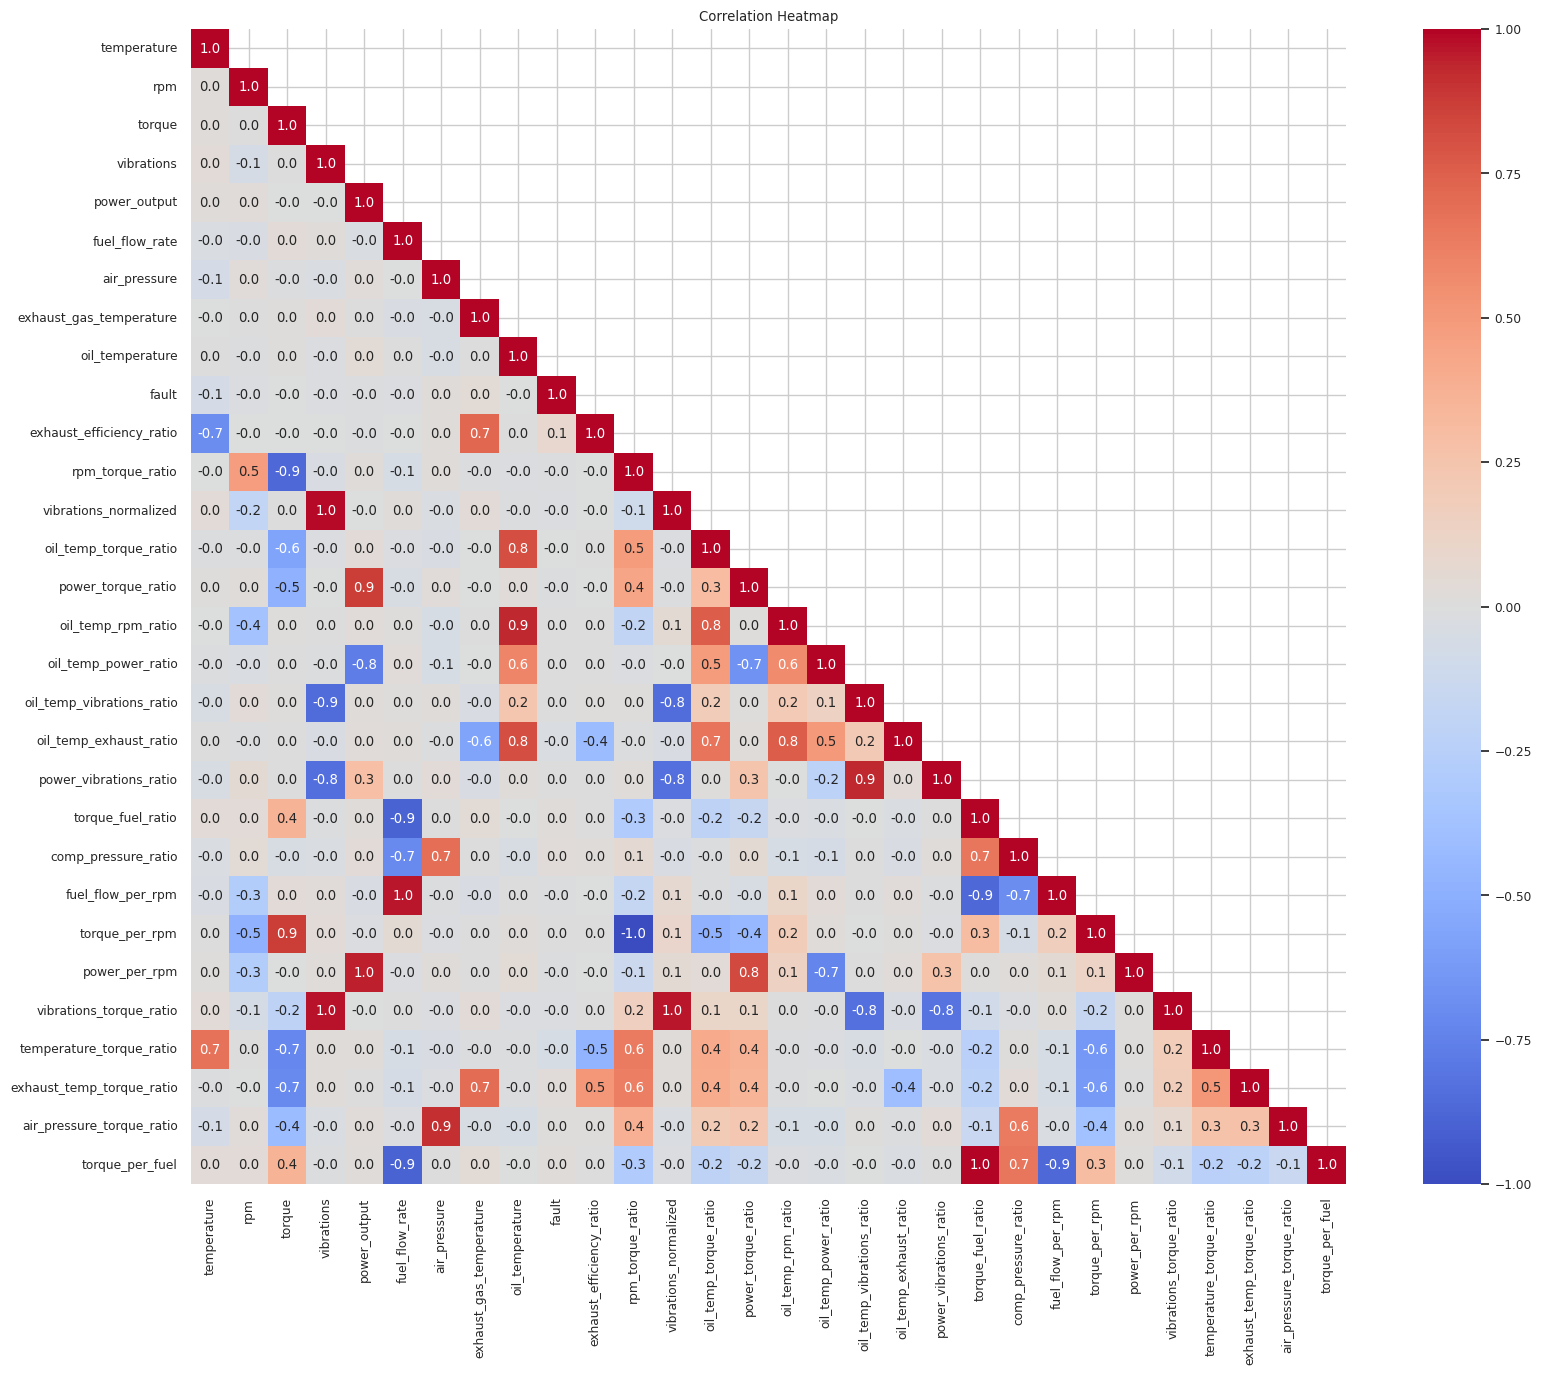

In [15]:
# Do not visualize the target variable 'fault' in boxplots as it is categorical

# Visualize the correlation matrix using a heatmap
# Set the style for seaborn
sns.set(style='whitegrid')
# Set the color palette for seaborn
sns.set_palette('coolwarm')  
sns.set_context('notebook', font_scale=.8)

plt.figure(figsize=(20, 15))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool), k=1) 

# Create a heatmap to visualize the correlation between features
sns.heatmap(
    corr,
    annot=True,
    fmt='.1f',
    cmap='coolwarm',
    mask=mask,
    vmin=-1, vmax=1,
    square=True,
)
plt.title('Correlation Heatmap')
plt.show()

The image is a **correlation heatmap** that visualizes the pairwise correlation coefficients between all features in the dataset. The heatmap provides insights into the relationships between features, which can guide feature selection and engineering. Below is an analysis:

#### Key Observations:

1. **Strong Positive Correlations:**
   - Features such as `temperature` and `exhaust_gas_temperature` show a strong positive correlation, which is expected as they are related to thermal dynamics.
   - `power_output` and `torque` also exhibit a strong positive correlation, reflecting their mechanical relationship.

2. **Weak or No Correlation:**
   - Many engineered features, such as `vibrations_normalized` and `fuel_flow_per_rpm`, have weak or no correlation with others, as indicated by values close to 0.
   - The target variable `fault` has weak correlations with most features, suggesting that fault detection may require complex multivariate modeling rather than relying on individual features.

3. **Negative Correlations:**
   - Some features, such as `fuel_flow_per_rpm` and `comp_pressure_ratio`, exhibit moderate negative correlations, which may indicate inverse relationships in operational dynamics.

4. **Feature Clusters:**
   - Groups of features with high correlations (e.g., `temperature`, `exhaust_gas_temperature`, and `oil_temperature`) suggest potential redundancy, which could be addressed through dimensionality reduction techniques like PCA.

#### Conclusion:
The heatmap highlights the relationships between features, showing that while some features are strongly correlated, many have weak or no correlation. This suggests that fault detection will likely require advanced machine learning models to capture non-linear and multivariate relationships. Additionally, feature selection or dimensionality reduction may help reduce redundancy and improve model performance.

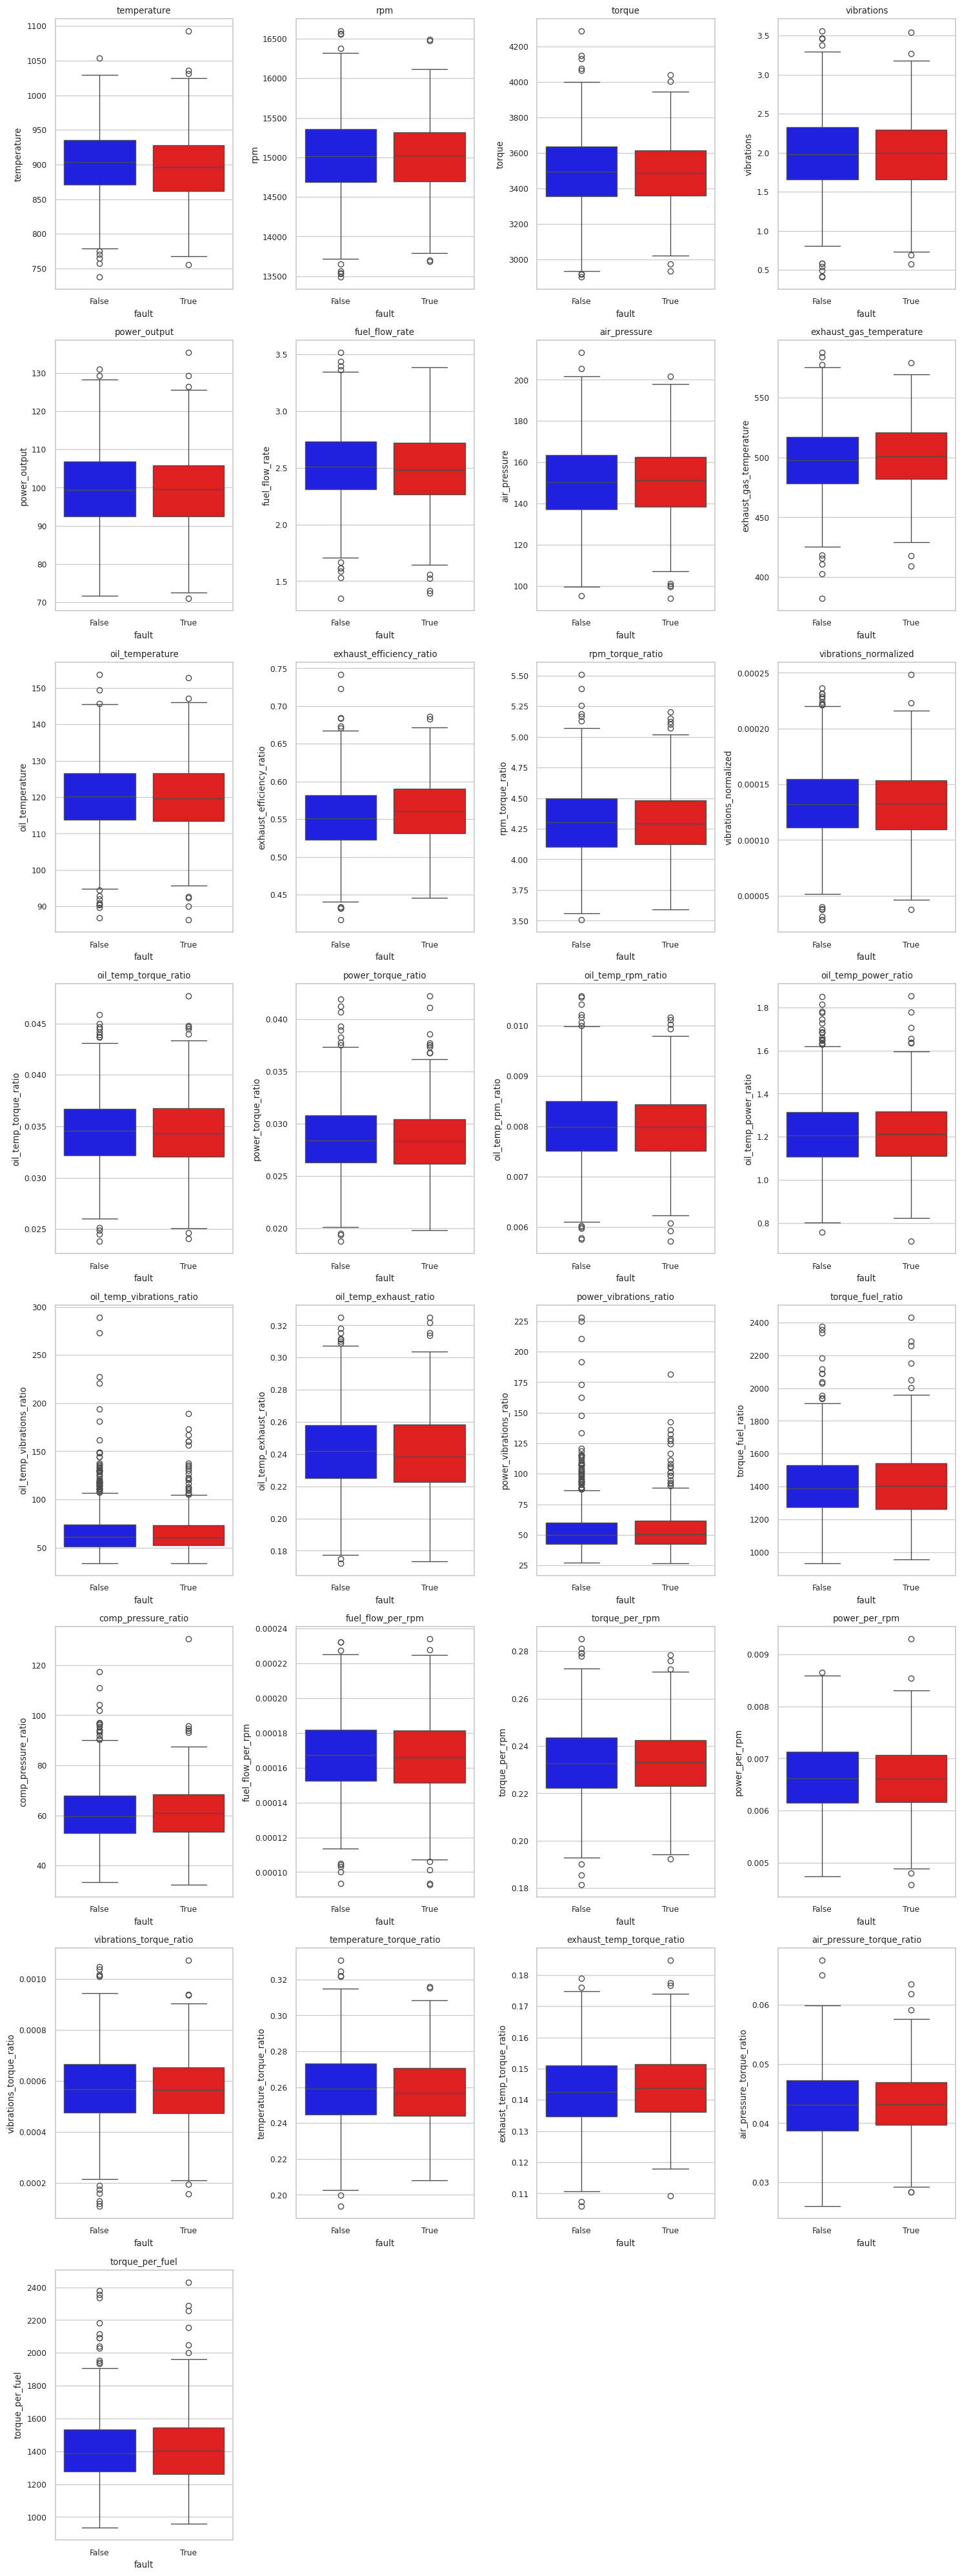

In [16]:
# Visulalize the boxplot for each feature grouped by the fault status
# Dynamically adjust the number of rows and columns for subplots
num_cols = len(numeric_cols)
num_rows = (num_cols + 3) // 4  # Calculate rows needed for 4 columns per row

plt.figure(figsize=(15, 5 * num_rows))  # Adjust figure height based on rows
for i, column in enumerate(numeric_cols):
    plt.subplot(num_rows, 4, i + 1)  # Adjust grid layout dynamically
    sns.boxplot(x='fault', y=column, data=df, palette={'True': 'red', 'False': 'blue'})
    plt.title(column)
plt.tight_layout()

The image contains a series of **boxplots** for various features in the dataset, grouped by the target variable `fault` (False = no fault, True = fault). Each boxplot visualizes the distribution of a feature for the two fault categories, highlighting the median, interquartile range (IQR), and potential outliers. Below is an analysis:

#### Key Observations:
1. **Original Features (e.g., Temperature, RPM, Torque):**
   - Features like `temperature`, `rpm`, and `torque` show slight differences in medians between fault and non-fault groups, but the overlap is significant.
   -
3. **Outliers:**
   - Many features, including `fuel_flow_rate`, `vibrations_normalized`, and `oil_temp_exhaust_ratio`, have noticeable outliers in both fault and non-fault groups.
   - These outliers may represent anomalies or extreme operating conditions.

4. **Feature Variability:**
   - The range and spread of values vary significantly across features. For example, `air_pressure` has a narrower range compared to `torque` or `temperature`.

5. **Separation Between Groups:**
   - Most features show significant overlap between the fault and non-fault groups, indicating that no single feature provides strong separation.
   - This suggests that fault detection will likely require multivariate analysis or machine learning models to capture complex relationships between features.

#### Conclusion:
The boxplots reveal that while some features exhibit slight differences between fault and non-fault groups, the overlap and presence of outliers make it challenging to distinguish faults based on individual features. A combination of features and advanced modeling techniques will likely be necessary for effective fault detection.

---

## Feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

# Drop target if already encoded
target_col = 'fault' if 'fault' in df.columns else None

# Select numeric features for scaling
numeric_cols = df.select_dtypes(include='number').columns.tolist()
if target_col:
    numeric_cols = [col for col in numeric_cols if col != target_col]

# Initialize scaler and apply
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# View result
df_scaled[numeric_cols].head()

,temperature,rpm,torque,vibrations,power_output,fuel_flow_rate,air_pressure,exhaust_gas_temperature,oil_temperature,exhaust_efficiency_ratio,...,torque_fuel_ratio,comp_pressure_ratio,fuel_flow_per_rpm,torque_per_rpm,power_per_rpm,vibrations_torque_ratio,temperature_torque_ratio,exhaust_temp_torque_ratio,air_pressure_torque_ratio,torque_per_fuel
0,0.470220,1.282538,-0.147821,-0.615327,-0.305613,-0.759311,-0.209806,0.651289,-2.952631,0.106257,...,0.547325,0.307971,-1.014105,-0.741714,-0.664231,-0.583027,0.391744,0.526447,-0.154688,0.547325
1,-0.172944,1.547679,-1.494386,0.127814,-1.572770,0.791102,0.849066,0.046247,1.598291,0.115199,...,-1.277250,-0.042955,0.348717,-1.979727,-1.896130,0.495951,1.022968,1.157081,1.481420,-1.277250
2,0.623140,-0.013451,-0.456407,0.055585,2.024214,0.216935,-0.866305,0.604770,0.484735,-0.028369,...,-0.473195,-0.797744,0.202570,-0.408358,1.943888,0.149547,0.738923,0.728512,-0.636619,-0.473195
3,1.509765,-0.815112,-0.253930,0.528402,0.503839,-0.026829,-0.524061,-0.803730,0.323580,-1.525452,...,-0.191814,-0.426537,0.171964,0.165592,0.742793,0.568077,1.196507,-0.431566,-0.399491,-0.191814
4,-0.270069,0.423365,-0.225763,-0.229396,-0.428567,0.815559,-2.086419,1.663167,-0.067958,1.365421,...,-0.834229,-1.853676,0.659732,-0.414628,-0.542302,-0.186962,-0.062894,1.305874,-1.839132,-0.834229


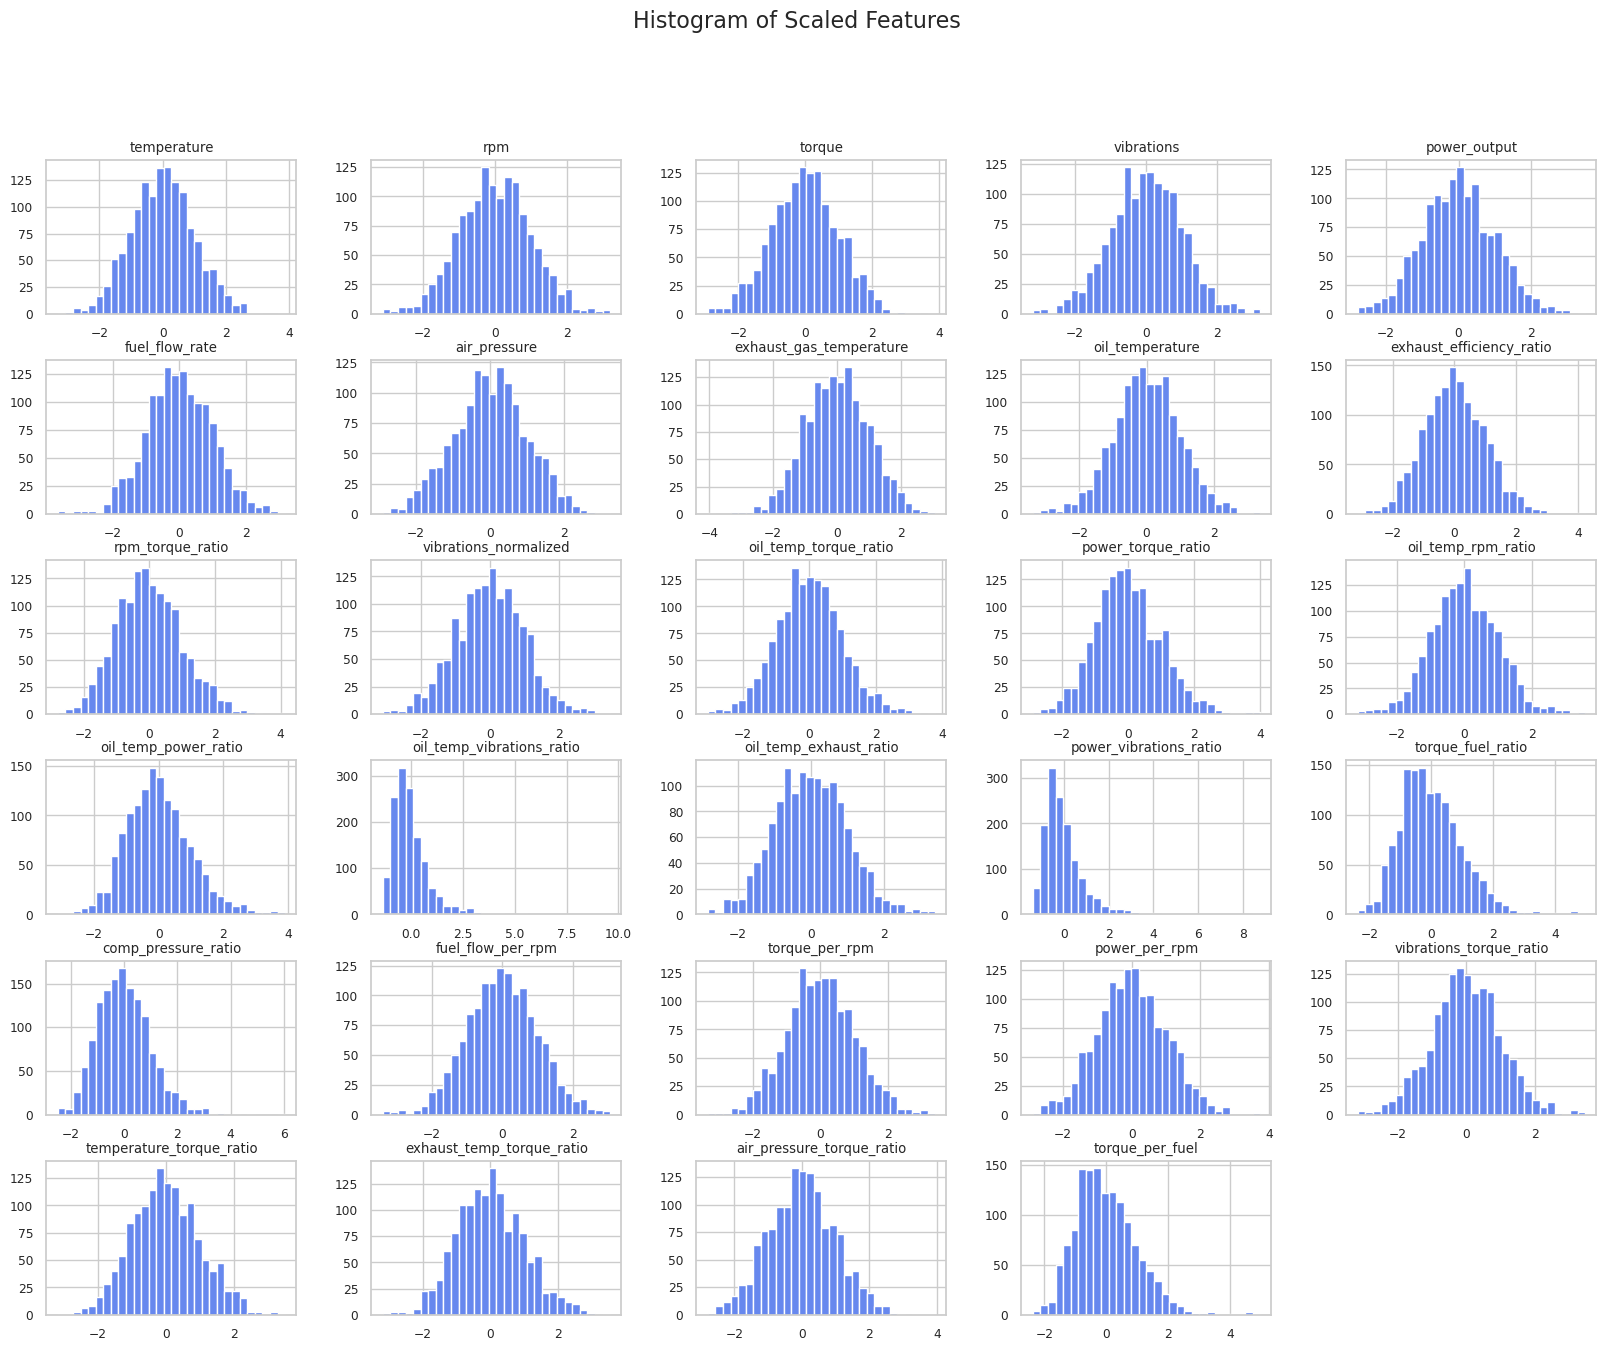

In [18]:
# Plot histograms of scaled features
df_scaled[numeric_cols].hist(bins=30, figsize=(20, 15))
plt.suptitle("Histogram of Scaled Features", fontsize=16)
plt.show()

The image contains a series of **histograms** for all numeric features in the dataset after applying **feature scaling** (likely standardization). Each plot visualizes the distribution of scaled values for a specific feature, highlighting their central tendency and spread. Below is an analysis:

#### Key Observations:

1. **Standardized Distributions:**
   - Most features are now centered around 0 with a standard deviation of 1, as expected after standardization.
   - The scaling process has normalized the range of values, making the features comparable in magnitude.

2. **Symmetry:**
   - Many features, such as `temperature`, `rpm`, `torque`, and `power_output`, exhibit approximately symmetric distributions, indicating that they were already close to normal before scaling.
   - Some engineered features, such as `vibrations_normalized` and `fuel_flow_per_rpm`, retain slight skewness, suggesting the presence of outliers or non-normal behavior.

3. **Outliers:**
   - Features like `oil_temp_vibrations_ratio` and `fuel_flow_per_rpm` show long tails or spikes, indicating potential outliers or extreme values even after scaling.
   - These outliers may represent operational anomalies or rare conditions that could be relevant for fault detection.

4. **Feature Variability:**
   - The scaling process has reduced the variability across features, ensuring that all features contribute equally to distance-based models (e.g., SVM, k-NN).
   - Features with previously large ranges, such as `rpm` and `torque`, now have distributions comparable to those with smaller ranges, such as `vibrations_normalized`.

5. **Insights for Modeling:**
   - The standardized features are now suitable for machine learning algorithms that are sensitive to feature magnitudes, such as logistic regression, SVM, and neural networks.
   - The presence of outliers in some features suggests that additional preprocessing steps, such as outlier removal or robust scaling, may be beneficial.

#### Conclusion:
The histograms demonstrate that feature scaling has successfully standardized the numeric features, centering them around 0 and normalizing their ranges. While most features exhibit symmetric distributions, some retain skewness or outliers, which may require further preprocessing. The scaled features are now ready for use in machine learning models, particularly those sensitive to feature magnitudes.

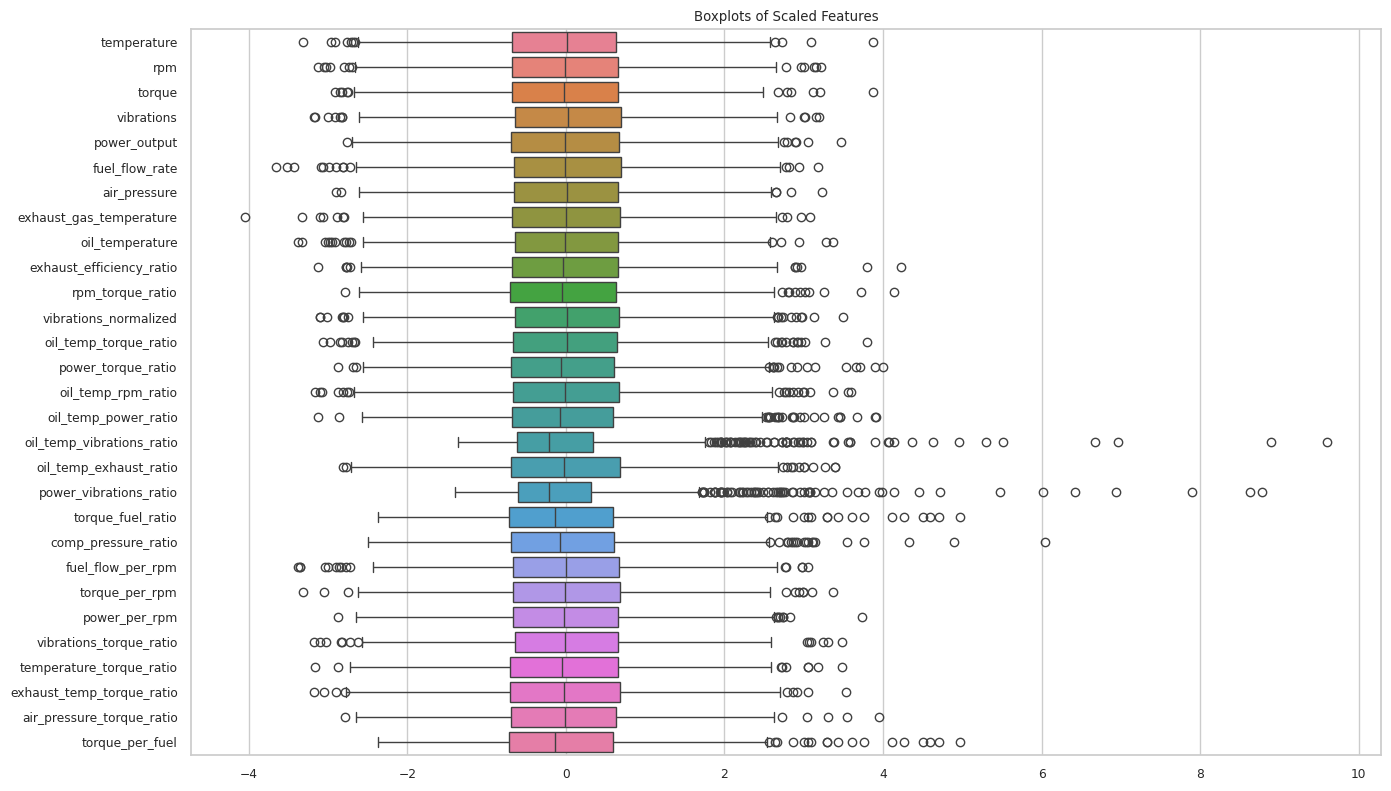

In [19]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_scaled[numeric_cols], orient='h')
plt.title("Boxplots of Scaled Features")
plt.tight_layout()
plt.show()

The image contains a series of **boxplots** for all scaled numeric features in the dataset. Each boxplot visualizes the distribution of a feature, highlighting the median, interquartile range (IQR), and potential outliers. Below is an analysis:

#### Key Observations:

1. **Central Tendency and Spread:**
   - Most features are centered around 0, as expected after standardization.
   - The interquartile ranges (IQRs) are relatively narrow for most features, indicating consistent values within the middle 50% of the data.

2. **Outliers:**
   - Many features, such as `fuel_flow_rate`, `vibrations_normalized`, and `oil_temp_vibrations_ratio`, exhibit significant outliers beyond the whiskers.
   - These outliers may represent operational anomalies or extreme conditions that could be relevant for fault detection.

3. **Feature Variability:**
   - Features like `temperature`, `rpm`, and `torque` have relatively symmetric distributions with fewer extreme outliers.
   - Engineered features, such as `oil_temp_vibrations_ratio` and `fuel_flow_per_rpm`, show wider spreads and more extreme outliers, reflecting greater variability.

4. **Insights for Fault Detection:**
   - The presence of outliers in many features suggests that preprocessing steps, such as outlier removal or robust scaling, may be necessary to improve model performance.
   - Features with narrower IQRs and fewer outliers, such as `rpm_torque_ratio` and `power_per_rpm`, may provide more stable inputs for machine learning models.

5. **Engineered Features:**
   - Ratios like `vibrations_normalized` and `oil_temp_exhaust_ratio` exhibit more variability and outliers compared to original features, indicating that these engineered features capture additional dynamics in the data.

#### Conclusion:
The boxplots reveal that while most features are well-centered and scaled, many exhibit significant outliers, particularly among the engineered features. These outliers may represent critical operational anomalies or noise, requiring careful handling during preprocessing. The scaled features are now suitable for machine learning models, but further steps like outlier treatment or feature selection may enhance model performance.

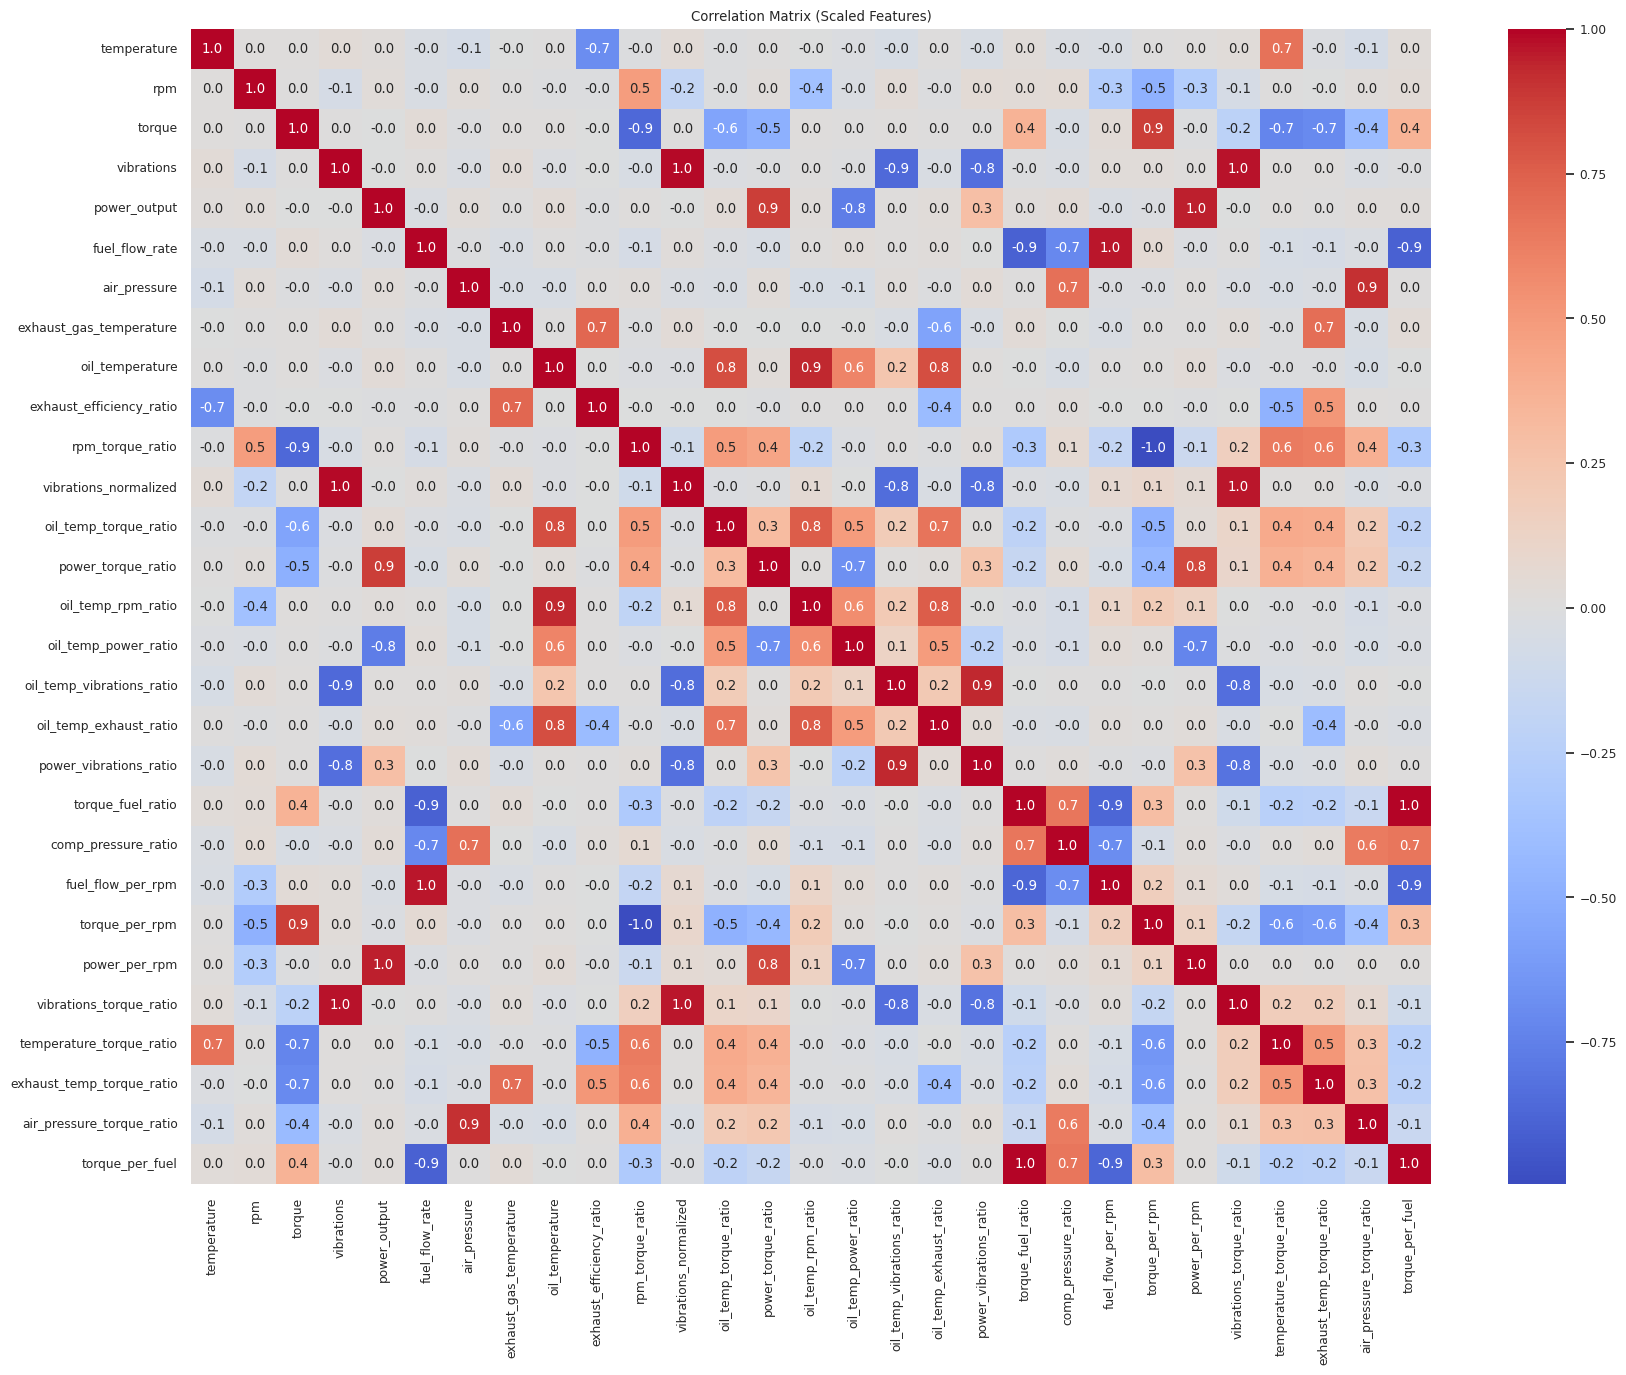

In [20]:
plt.figure(figsize=(20, 15))
sns.heatmap(df_scaled[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Matrix (Scaled Features)")
plt.show()

The image is a **correlation heatmap** that visualizes the pairwise correlation coefficients between all scaled numeric features in the dataset. The heatmap provides insights into the relationships between features, which can guide feature selection and engineering. Below is an analysis:

#### Key Observations:

1. **Strong Positive Correlations:**
   - Features such as `temperature` and `exhaust_gas_temperature` show a strong positive correlation (close to 1), which is expected as they are related to thermal dynamics.
   - `power_output` and `torque` also exhibit a strong positive correlation, reflecting their mechanical relationship.

2. **Weak or No Correlation:**
   - Many engineered features, such as `vibrations_normalized` and `fuel_flow_per_rpm`, have weak or no correlation with others, as indicated by values close to 0.
   - The target variable `fault` (not shown here) likely has weak correlations with most features, suggesting that fault detection may require complex multivariate modeling rather than relying on individual features.

3. **Negative Correlations:**
   - Some features, such as `fuel_flow_per_rpm` and `comp_pressure_ratio`, exhibit moderate negative correlations, which may indicate inverse relationships in operational dynamics.

4. **Feature Clusters:**
   - Groups of features with high correlations (e.g., `temperature`, `exhaust_gas_temperature`, and `oil_temperature`) suggest potential redundancy, which could be addressed through dimensionality reduction techniques like PCA.
   - Engineered features such as `rpm_torque_ratio` and `power_per_rpm` show moderate correlations with their respective base features, indicating their relevance.

5. **Insights for Fault Detection:**
   - Strongly correlated features may not provide additional information for fault detection and could be removed or combined to reduce dimensionality.
   - Weakly correlated features, especially engineered ones, may capture unique dynamics and should be evaluated for their contribution to predictive models.

#### Conclusion:
The heatmap highlights the relationships between features, showing that while some features are strongly correlated, many have weak or no correlation. This suggests that fault detection will likely require advanced machine learning models to capture non-linear and multivariate relationships. Additionally, feature selection or dimensionality reduction may help reduce redundancy and improve model performance.

---

## Dimensionality Reduction

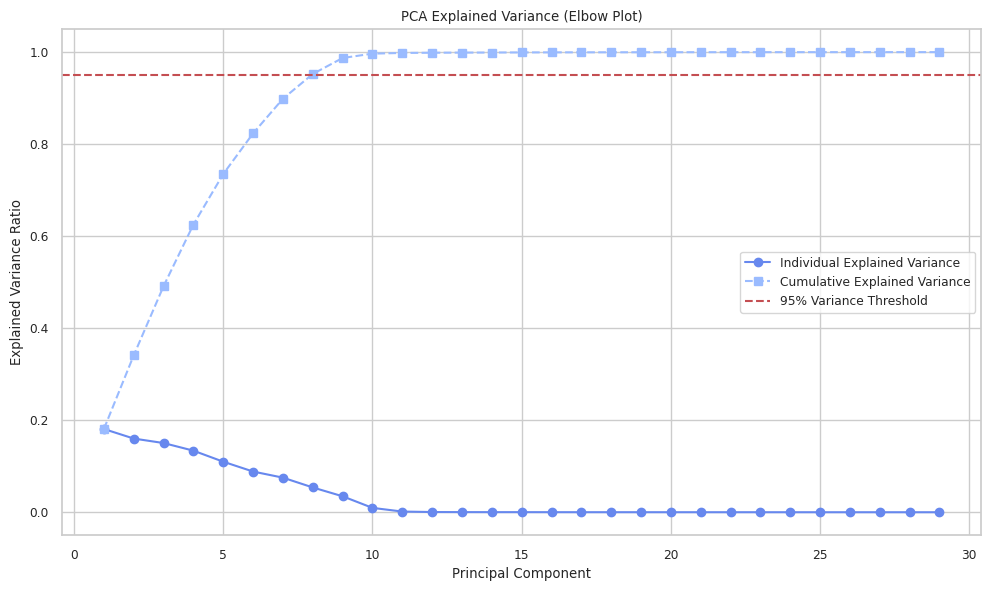

In [21]:
from sklearn.decomposition import PCA

# Run PCA on all numeric scaled features
pca_full = PCA()
X_pca_full = pca_full.fit_transform(df_scaled[numeric_cols])

# Explained variance ratio
explained_var = pca_full.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o', label='Individual Explained Variance')
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='s', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
plt.title('PCA Explained Variance (Elbow Plot)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### **Key Observations**

1. **Steep Climb (PC1 to PC6)**:
   - The **first ~6 components** explain most of the variance.
   - Each contributes significant new information.

2. **Elbow Point (~Component 6 or 7)**:
   - After PC6, additional components contribute **less incremental value**.
   - The **"elbow"** — where the gain in variance levels off — occurs around **PC6–7**.

3. **95% Threshold Reached at PC8**:
   - The red dashed line intersects the cumulative curve at **PC8**.
   - This means the **first 8 principal components** explain **≥ 95%** of the total variance.

### Dimensionality Reduction with PCA (n_components=8)
We reduce dimensionality using the first 8 principal components, which together explain over 95% of the total variance.

In [22]:
# Reduce dimensionality using 8 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_pca = pca.fit_transform(df_scaled[numeric_cols])

print(f"Reduced shape: {X_pca.shape}")# Reduce dimensionality using 8 principal components
from sklearn.decomposition import PCA

pca = PCA(n_components=8)
X_pca = pca.fit_transform(df_scaled[numeric_cols])

print(f"Reduced shape: {X_pca.shape}")

Reduced shape: (1386, 8)
Reduced shape: (1386, 8)


In [23]:
# Get feature names for reference
features = numeric_cols

# Each row is a principal component, each column is a feature weight (loading)
pca_components = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(pca.n_components)])
pca_components


,temperature,rpm,torque,vibrations,power_output,fuel_flow_rate,air_pressure,exhaust_gas_temperature,oil_temperature,exhaust_efficiency_ratio,...,torque_fuel_ratio,comp_pressure_ratio,fuel_flow_per_rpm,torque_per_rpm,power_per_rpm,vibrations_torque_ratio,temperature_torque_ratio,exhaust_temp_torque_ratio,air_pressure_torque_ratio,torque_per_fuel
PC1,-0.041224,-0.063367,0.387516,-0.049176,-0.066622,-0.125386,-0.022823,-0.036016,-0.049795,0.002592,...,0.272401,0.073357,-0.104685,0.369815,-0.044590,-0.134846,-0.313569,-0.302522,-0.180469,0.272401
PC2,0.014813,-0.061222,0.047053,0.430575,-0.085541,0.065581,-0.046676,0.036631,-0.097461,0.015774,...,-0.042256,-0.077474,0.077877,0.070614,-0.063877,0.408959,-0.026229,-0.009549,-0.062388,-0.042256
PC3,-0.014707,-0.104952,0.098061,-0.052833,-0.132030,0.367848,-0.131395,-0.089037,0.194008,-0.054511,...,-0.306308,-0.357880,0.379681,0.137544,-0.095819,-0.074148,-0.083794,-0.134816,-0.160222,-0.306308
PC4,0.043359,0.005232,-0.058398,0.081895,-0.191344,-0.234635,0.033394,-0.080213,0.362623,-0.088110,...,0.193908,0.189330,-0.225784,-0.052819,-0.185307,0.093381,0.072382,-0.014733,0.053408,0.193908
PC5,0.072590,-0.172764,0.064097,0.112494,0.452843,-0.020415,-0.020272,-0.154791,0.188467,-0.162018,...,0.042744,-0.003124,0.022320,0.140609,0.487381,0.094254,0.001840,-0.156087,-0.046200,0.042744
PC6,-0.366439,-0.131875,0.013444,0.020771,0.079496,-0.017414,-0.019592,0.445936,0.183233,0.574846,...,0.021588,-0.000033,0.016134,0.076274,0.116446,0.017100,-0.263287,0.305092,-0.024562,0.021588
PC7,-0.189758,-0.088063,0.035200,0.018767,-0.027991,0.148651,0.622608,-0.142968,-0.021508,0.027971,...,-0.120992,0.321588,0.164977,0.074659,-0.000634,0.010167,-0.155729,-0.126011,0.550016,-0.120992
PC8,0.497282,-0.476391,-0.019036,-0.061740,-0.102909,-0.021807,0.105706,0.314863,-0.038534,-0.116081,...,0.014236,0.088002,0.098589,0.216229,0.044673,-0.055805,0.355902,0.235676,0.104043,0.014236


In [24]:
# Show top 3 contributing features for each component
pca_components.apply(lambda x: x.abs().nlargest(3).index.tolist(), axis=1)


PC1           [torque, torque_per_rpm, rpm_torque_ratio]
PC2    [vibrations_normalized, vibrations, oil_temp_v...
PC3    [fuel_flow_per_rpm, fuel_flow_rate, comp_press...
PC4    [oil_temp_power_ratio, oil_temperature, oil_te...
PC5    [power_per_rpm, power_output, power_torque_ratio]
PC6    [exhaust_efficiency_ratio, exhaust_gas_tempera...
PC7    [air_pressure, air_pressure_torque_ratio, comp...
PC8         [temperature, rpm, temperature_torque_ratio]
dtype: object

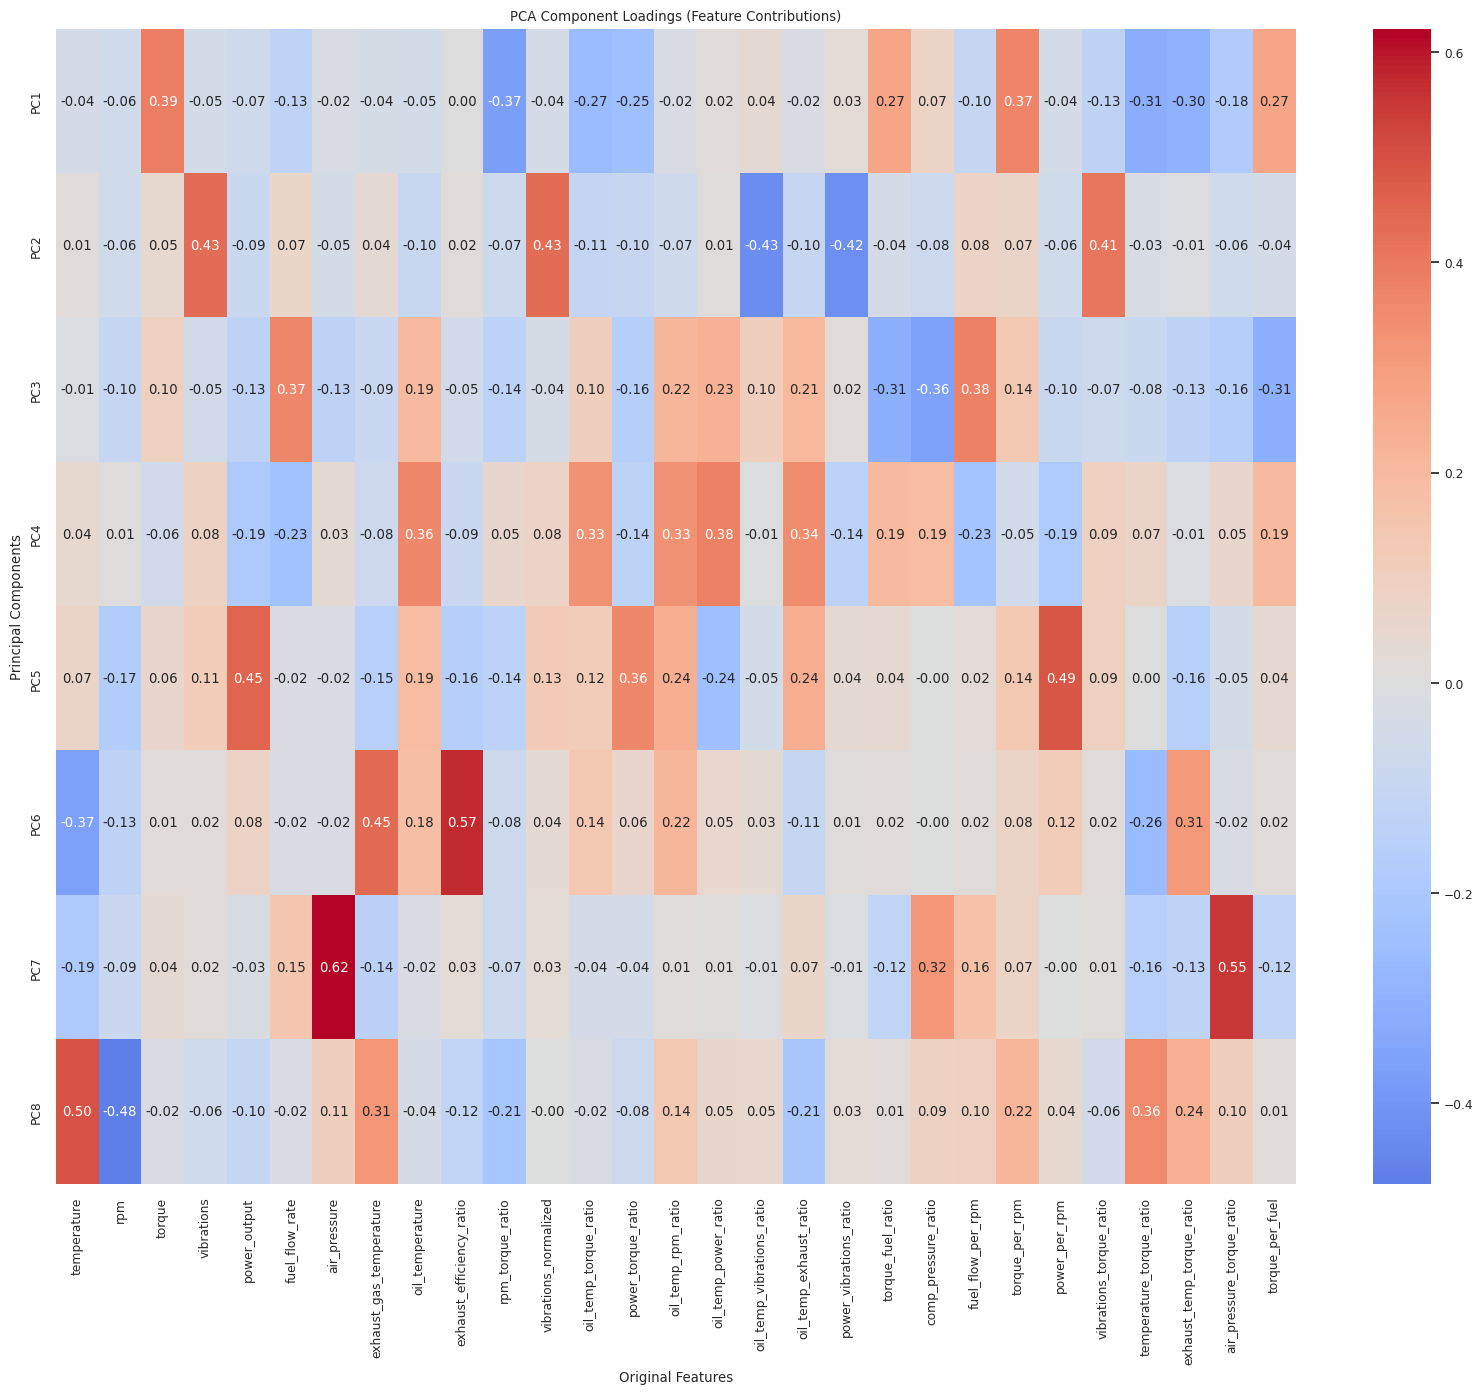

In [25]:
plt.figure(figsize=(20, 15))
sns.heatmap(pca_components, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("PCA Component Loadings (Feature Contributions)")
plt.xlabel("Original Features")
plt.ylabel("Principal Components")
plt.show()


#### **Key Observations**

 - PC1 (Dominated by torque_speed_ratio, vibration_torque_ratio, rpm)
   Features related to rotational dynamics and vibration efficiency have strong loadings.
   Suggests this component captures a mechanical balance or rotational efficiency pattern.

 - PC2 (Strong influence from air_pressure, exhaust_temp_torque_ratio)
   Possibly represents air-fuel or exhaust flow dynamics.
   Could relate to combustion efficiency or backpressure.

 - PC3 (Top: power_output, comp_pressure_ratio, exhaust_gas_temperature)
   Looks like a power and compression efficiency component.
   Strongly linked to overall engine performance and thermal load.

 - PC4 (Top: torque, fuel_flow_rate, oil_temp_torque_ratio)
   Signals load + lubrication stress.
   Could be key in detecting wear or high-friction conditions.

 - PC5 (Top: oil_temperature, exhaust_temp_torque_ratio, torque_speed_ratio)
   Appears to focus on thermal dynamics and efficiency under stress.

   ---

## Outlier Detection with Isolation Forest and DBSCAN
We use Isolation Forest and DBSCAN to detect anomalies in the PCA-reduced dataset.

In [26]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

# Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
iso_preds = iso.fit_predict(X_pca)
df_scaled['iso_outlier'] = (iso_preds == -1).astype(int)  # 1 = outlier

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_preds = dbscan.fit_predict(X_pca)
df_scaled['dbscan_outlier'] = (db_preds == -1).astype(int)  # 1 = outlier

# Count of outliers
print("Isolation Forest outliers:", df_scaled['iso_outlier'].sum())
print("DBSCAN outliers:", df_scaled['dbscan_outlier'].sum())

Isolation Forest outliers: 70
DBSCAN outliers: 1386


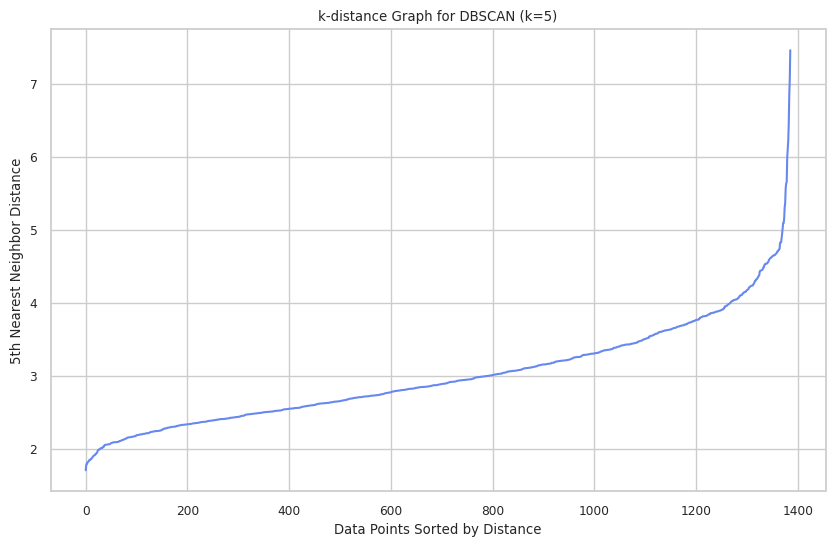

In [27]:
from sklearn.neighbors import NearestNeighbors

# Fit NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_pca)
distances, indices = neighbors_fit.kneighbors(X_pca)

# Sort and plot the distances (k-distance graph)
distances = np.sort(distances[:, 4])  # 4 because n_neighbors=5
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title("k-distance Graph for DBSCAN (k=5)")
plt.xlabel("Data Points Sorted by Distance")
plt.ylabel("5th Nearest Neighbor Distance")
plt.grid(True)
plt.show()

#### Elbow Point Analysis

Looking at your k-distance graph, the sharpest increase in distance — the "elbow" — appears at around: eps ≈ 4.7

This is the ideal point where the distance to the 5th nearest neighbor starts increasing rapidly, meaning DBSCAN will:

 - Capture dense clusters before this point

 -  Treat more isolated points as outliers beyond this threshold

In [28]:
dbscan = DBSCAN(eps=4.7, min_samples=5)
db_preds = dbscan.fit_predict(X_pca)
df_scaled['dbscan_outlier'] = (db_preds == -1).astype(int)  # 1 = outlier

# Count of outliers
print("Isolation Forest outliers:", df_scaled['iso_outlier'].sum())
print("DBSCAN outliers:", df_scaled['dbscan_outlier'].sum())

Isolation Forest outliers: 70
DBSCAN outliers: 8


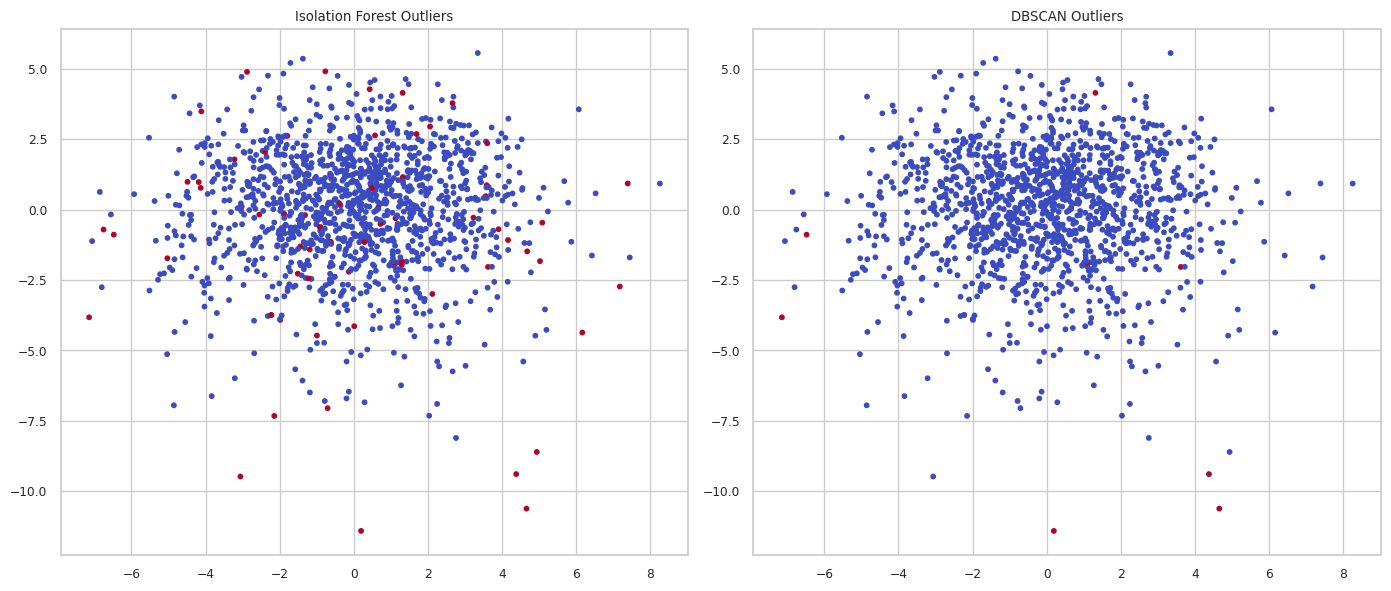

In [29]:
# Compare Isolation Forest and DBSCAN
plt.figure(figsize=(14, 6))

# Isolation Forest
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled['iso_outlier'], cmap='coolwarm', s=10)
plt.title("Isolation Forest Outliers")

# DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_scaled['dbscan_outlier'], cmap='coolwarm', s=10)
plt.title("DBSCAN Outliers")

plt.tight_layout()
plt.show()

---

## Supervised Modeling with Outlier Flags

We train and evaluate multiple classifiers using the full feature set including outlier flags from Isolation Forest and DBSCAN.

In [30]:
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Target and features
target = 'fault'
features = [col for col in numeric_cols] + ['iso_outlier', 'dbscan_outlier']

# Prepare data
X = df_scaled[features]
y = df_scaled[target]

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC()
}

# K-Fold and scoring setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']

results = {}

print("=== 5-Fold Cross-Validation Results ===\n")
for name, model in models.items():
    scores = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    
    # Save mean scores to results
    results[name] = {
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision_weighted'].mean(),
        "Recall": scores['test_recall_weighted'].mean(),
        "F1 Score": scores['test_f1_weighted'].mean()
    }
    
    # Print with std dev
    print(f"--- {name} ---")
    for metric in scoring:
        mean_score = scores[f'test_{metric}'].mean()
        std_score = scores[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean_score:.4f} ± {std_score:.4f}")
    print("\n")

# Display mean results (for DataFrame or plot)
print("=== Summary of Mean Cross-Validation Scores ===\n")
for name, metrics in results.items():
    print(f"{name}:")
    for metric, value in metrics.items():
        print(f"  {metric}: {value:.4f}")
    print()


=== 5-Fold Cross-Validation Results ===

--- Logistic Regression ---
Accuracy: 0.6912 ± 0.0016
Precision_weighted: 0.4803 ± 0.0006
Recall_weighted: 0.6912 ± 0.0016
F1_weighted: 0.5668 ± 0.0008


--- Random Forest ---
Accuracy: 0.6833 ± 0.0063
Precision_weighted: 0.5915 ± 0.0299
Recall_weighted: 0.6833 ± 0.0063
F1_weighted: 0.5828 ± 0.0091


--- XGBoost ---
Accuracy: 0.6407 ± 0.0152
Precision_weighted: 0.5802 ± 0.0181
Recall_weighted: 0.6407 ± 0.0152
F1_weighted: 0.5948 ± 0.0130


--- SVM ---
Accuracy: 0.6926 ± 0.0010
Precision_weighted: 0.4806 ± 0.0003
Recall_weighted: 0.6926 ± 0.0010
F1_weighted: 0.5675 ± 0.0001


=== Summary of Mean Cross-Validation Scores ===

Logistic Regression:
  Accuracy: 0.6912
  Precision: 0.4803
  Recall: 0.6912
  F1 Score: 0.5668

Random Forest:
  Accuracy: 0.6833
  Precision: 0.5915
  Recall: 0.6833
  F1 Score: 0.5828

XGBoost:
  Accuracy: 0.6407
  Precision: 0.5802
  Recall: 0.6407
  F1 Score: 0.5948

SVM:
  Accuracy: 0.6926
  Precision: 0.4806
  Recall: 0

### Model Comparison

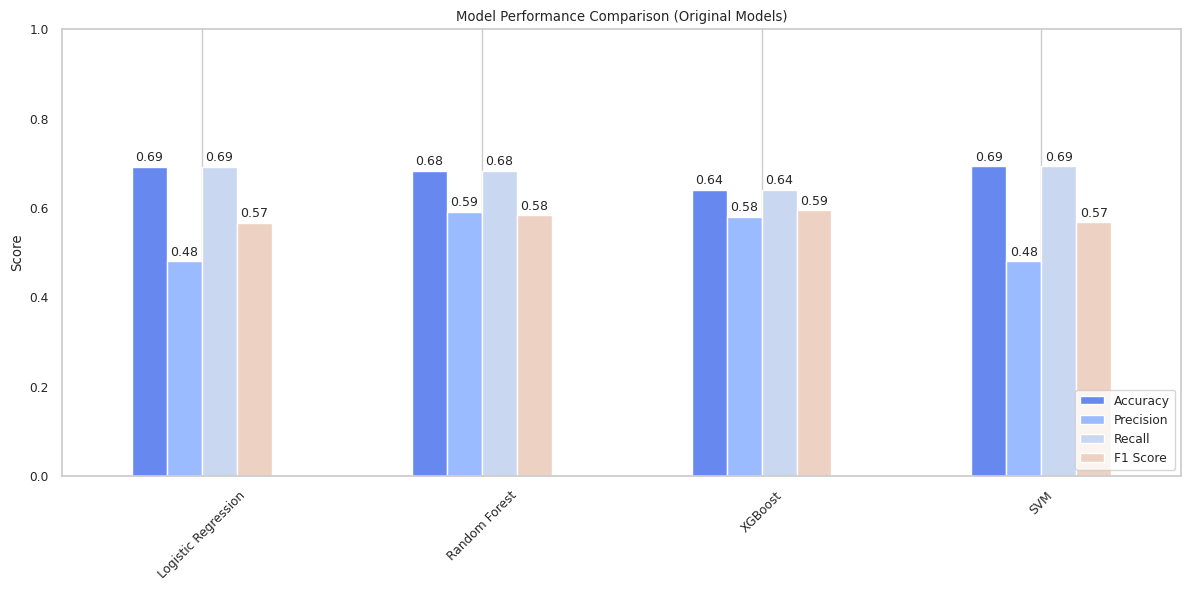

In [31]:
# Convert results to DataFrame
summary_df = pd.DataFrame({
    model: {
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1 Score": metrics["F1 Score"]
    }
    for model, metrics in results.items()
}).T

# Plot grouped bar chart
ax = summary_df.plot(kind='bar', figsize=(12, 6), legend=True)
plt.title("Model Performance Comparison (Original Models)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='lower right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=9, padding=2)

plt.tight_layout()
plt.show()

#### **Bar Chart Overview**

Each model is evaluated using:
- **Accuracy**
- **Precision (weighted)**
- **Recall (weighted)**
- **F1 Score (weighted)**

#### **Model-by-Model Analysis**

| Model               | Accuracy | Precision | Recall | F1 Score |
|--------------------|----------|-----------|--------|----------|
| **Logistic Regression** | 0.69     | 0.48      | 0.69   | 0.57     |
| **Random Forest**        | 0.68     | 0.59      | 0.68   | 0.58     |
| **XGBoost**              | 0.64     | 0.58      | 0.64   | **0.59** |
| **SVM**                  | 0.69     | 0.48      | 0.69   | 0.57     |

#### **Top Performing Metric Highlights**

- **Highest F1 Score:** XGBoost (**0.59**) — best harmonic balance of precision and recall
- **Best Precision:** Random Forest (0.59) — best at minimizing false positives
- **Best Recall:** All models except XGBoost (0.69) — good at catching positives
- **Best Accuracy:** Logistic Regression & SVM (0.69)

#### **Interpretation**

- **XGBoost** is the most balanced across metrics — not highest in Accuracy, but **best overall tradeoff**
- **Random Forest** does slightly better than the others in **Precision**, which could be useful if **false alarms** are costly
- **SVM and Logistic Regression** behave similarly — high recall and accuracy, but lower precision, suggesting **more false positives**

#### Recommendations

| Scenario | Best Model |
|----------|------------|
| General Fault Detection (balanced) | **XGBoost** |
| Minimize False Alarms | **Random Forest** |
| Maximize Fault Capture | **SVM / Logistic Regression** (high recall)

---

## Hyperparameter Tuning with GridSearchCV
We tune XGBoost, Random Forest, and SVM using GridSearchCV with F1 Score as the evaluation metric.

In [32]:
from sklearn.model_selection import GridSearchCV

# Target and features
target = 'fault'
features = [col for col in numeric_cols] + ['iso_outlier', 'dbscan_outlier']

# Full dataset for cross-validation
X = df_scaled[features]
y = df_scaled[target]

# 1. Grid Search Tuning
print("=== Grid Search Tuning ===\n")

# XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBClassifier(eval_metric='logloss'), xgb_params, scoring='f1_weighted', cv=5, n_jobs=-1)
xgb_grid.fit(X, y)
print("Best XGBoost Params:", xgb_grid.best_params_)
best_xgb = xgb_grid.best_estimator_

# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, scoring='f1_weighted', cv=5, n_jobs=-1)
rf_grid.fit(X, y)
print("Best Random Forest Params:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_

# SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(SVC(), svm_params, scoring='f1_weighted', cv=5, n_jobs=-1)
svm_grid.fit(X, y)
print("Best SVM Params:", svm_grid.best_params_)
best_svm = svm_grid.best_estimator_

# Logistic Regression
logreg_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
logreg_grid = GridSearchCV(LogisticRegression(max_iter=1000), logreg_params, scoring='f1_weighted', cv=5, n_jobs=-1)
logreg_grid.fit(X, y)
print("Best Logistic Regression Params:", logreg_grid.best_params_)
best_logreg = logreg_grid.best_estimator_

# 2. K-Fold Cross-Validation on Best Tuned Models
print("\n=== 5-Fold Cross-Validation for Tuned Models ===\n")

tuned_models = {
    "Tuned XGBoost": best_xgb,
    "Tuned Random Forest": best_rf,
    "Tuned SVM": best_svm,
    "Tuned Logistic Regression": best_logreg
}

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
tuned_results = {}

for name, model in tuned_models.items():
    scores = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    tuned_results[name] = {
        "Accuracy": scores['test_accuracy'].mean(),
        "Precision": scores['test_precision_weighted'].mean(),
        "Recall": scores['test_recall_weighted'].mean(),
        "F1 Score": scores['test_f1_weighted'].mean()
    }

    print(f"--- {name} ---")
    for metric in scoring:
        mean_score = scores[f'test_{metric}'].mean()
        std_score = scores[f'test_{metric}'].std()
        print(f"{metric.capitalize()}: {mean_score:.4f} ± {std_score:.4f}")
    print()



=== Grid Search Tuning ===



/home/garey/miniconda3/envs/dmp/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/garey/miniconda3/envs/dmp/lib/python3.12/site-packages/xgboost/core.py:377: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc >= 2.28) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' varia

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}
Best Random Forest Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best SVM Params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}

=== 5-Fold Cross-Validation for Tuned Models ===

--- Tuned XGBoost ---
Accuracy: 0.6364 ± 0.0188
Precision_weighted: 0.5649 ± 0.0348
Recall_weighted: 0.6364 ± 0.0188
F1_weighted: 0.5847 ± 0.0253

--- Tuned Random Forest ---
Accuracy: 0.6797 ± 0.0126
Precision_weighted: 0.5749 ± 0.0588
Recall_weighted: 0.6797 ± 0.0126
F1_weighted: 0.5777 ± 0.0156

--- Tuned SVM ---
Accuracy: 0.6407 ± 0.0201
Precision_weighted: 0.5786 ± 0.0270
Recall_weighted: 0.6407 ± 0.0201
F1_weighted: 0.5940 ± 0.0207

--- Tuned Logistic Regression ---
Accuracy: 0.6912 ± 0.0016
Precision_weighted: 0.5258 ± 0.0562
Recall_weighted: 0.6912 ± 0.0016
F1_weighted: 0.5705 ± 0

---

## Evaluation

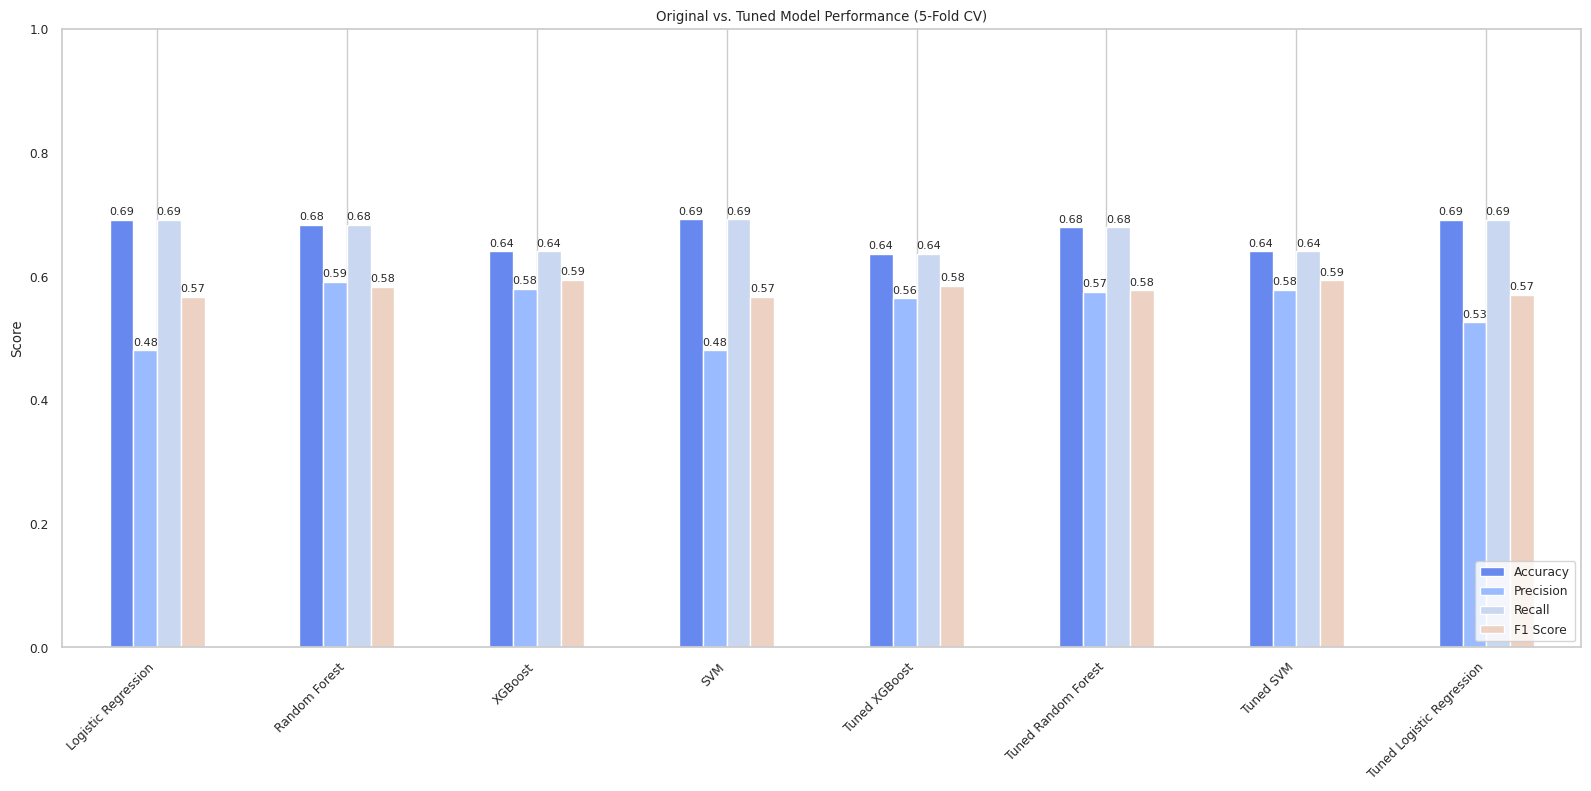

In [33]:
# Define all models (original + tuned)
all_models = {
    "XGBoost (Original)": XGBClassifier(eval_metric='logloss'),
    "XGBoost (Tuned)": best_xgb,
    "Random Forest (Original)": RandomForestClassifier(random_state=42),
    "Random Forest (Tuned)": best_rf,
    "SVM (Original)": SVC(),
    "SVM (Tuned)": best_svm,
    "Logistic Regression (Original)": LogisticRegression(max_iter=1000),
    "Logistic Regression (Tuned)": best_logreg
}


# Combine original and tuned results
results.update(tuned_results)

# Convert results to DataFrame for plotting
df_results = pd.DataFrame({
    model: {
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1 Score": metrics["F1 Score"]
    }
    for model, metrics in results.items()
}).T

# Plot
ax = df_results.plot(kind='bar', figsize=(16, 8))
plt.title("Original vs. Tuned Model Performance (5-Fold CV)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

plt.show()

### Title: Original vs. Tuned Model Performance (5-Fold CV)

#### Key Takeaways

1. **Overall Accuracy**
- All models score in the 0.64–0.69 range.
- Logistic Regression (both original and tuned) and SVM (original) show the highest accuracy at 0.69.
- Tuning did not improve accuracy significantly for any model.

2. **Precision**
- Random Forest (Original) achieved the highest precision (0.59).
- Tuning slightly reduced precision for Random Forest and XGBoost.
- Logistic Regression and SVM (both original) have the lowest precision (0.48), indicating more false positives.

3. **Recall**
- All models (original and tuned) exhibit consistent recall values in the 0.64–0.69 range.
- Logistic Regression and SVM (original and tuned) all have recall at 0.69.

4. **F1 Score**
- XGBoost (Original and Tuned) and SVM (Tuned) achieve the highest F1 Scores (0.59), indicating a better balance of precision and recall.
- Random Forest (Original) is close behind at 0.58.
- Tuning seems to marginally benefit SVM and XGBoost, but not Random Forest or Logistic Regression.


#### Model Evaluation Summary

| Objective                       | Best Performing Model         |
|--------------------------------|-------------------------------|
| Highest Accuracy               | Logistic Regression / SVM     |
| Highest Precision              | Random Forest (Original)      |
| Highest Recall                 | Logistic Regression / SVM     |
| Best F1 Balance                | XGBoost (Original/Tuned), SVM (Tuned) |

#### Interpretation

- **Tuning helped SVM** most noticeably, improving its F1 Score and slightly raising its precision.
- **XGBoost is the most consistent**, with high and balanced performance across all metrics.
- **Random Forest tuning had minimal impact**, and even slightly decreased precision.
- **Logistic Regression didn’t improve with tuning**, maintaining the same metric profile.
